# Introduction

Superstore is a fictional retail business located in the United States which sells Office Supplies, Furniture, and Technology Products. Their customers are the mass Consumer, Corporate and Home Offices. This business has been running from 03 January 2018. They want to analyze and assess their business performance from early 2018 to the end of 2021 such as identifying the customer segments and the purchasing patterns of customers.

*Note: the picture is for reference only*

<img src="image/superstore.jpg" width="500">

## Objective

- To get some insights about Superstore's market performance and main driver of loss in Superstore.
- To identify and understand customer segments in Superstore.
- To identify and understand purchasing patterns of customers in Superstore.

## Business  value

- We could identify opportunities for Superstore to boost business growth.
- We could treat each customer differently according to their segments. (reducing the risk and increasing the efficiency in deciding marketing strategy deployment in Superstore).
- We could help product development team to develop a product and to create product differentiation based on history of product purchases.

## Methodology

- Exploratory Data Analysis.
- Customer segmentation using clustering algorithm i.e. K-Means, Gaussian Mixture Model, and Hierarchical Clustering.
- Market basket analysis using apriori algorithm.

## The dataset

The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/sirajahmad/superstore) and also provided in [Tableau community](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls). The timestamps are from **03 January 2018** to **30 December 2021**. This dataset only contains sales information in United States but if you want more granular sales across different country, There are also Global Superstore dataset (click [here](https://www.kaggle.com/datasets/gauravtopre/global-superstore-dataset)) which provides more granular Superstore's sales across different country (but the timestamps are different).

There will be one file after downloading the dataset, that is `Sample - Superstore.xls` which contains sheet about the orders (`Orders` sheet name), the regional manager each region (`People` sheet name), and the returned product (`Returns` sheet name).

Data description for `Orders`:
- `Row ID` &rarr; Unique ID for each row.
- `Order ID` &rarr; Unique Order ID for each Customer.
- `Order Date` &rarr; Order Date of the product.
- `Ship Date` &rarr; Shipping Date of the Product.
- `Ship Mode` &rarr; Shipping Mode specified by the Customer.
- `Customer ID` &rarr; Unique ID to identify each Customer.
- `Customer Name` &rarr; Name of the Customer.
- `Segment` &rarr; The segment where the Customer belongs.
- `Country/Region` &rarr; Country of residence of the Customer.
- `City` &rarr; City of residence of the Customer.
- `State` &rarr; State of residence of the Customer.
- `Postal Code` &rarr; Postal Code of every Customer.
- `Region` &rarr; Region where the Customer belongs.
- `Product ID` &rarr; Unique ID of the Product.
- `Category` &rarr; Category of the Product.
- `Sub-Category` &rarr; Sub-Category of the Product.
- `Product Name` &rarr; Name of the Product.
- `Sales` &rarr; Total Sales of the Product.
- `Quantity` &rarr; Quantity of the Product.
- `Discount` &rarr; Discount provided.
- `Profit` &rarr; Profit/Loss incurred (profit = positive value & loss = negative value).

Data description for `Returns`:
- `Returned` &rarr; If the Order has been returned.
- `Order ID` &rarr; Unique Order ID for each Customer.

Data description for `People`:
- `Regional Manager` &rarr; Name of the Regional Manager.
- `Region` &rarr; Region where the Customer belongs.

# Load and combine the dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import datetime as dt
import datetime

In [2]:
# load the dataset
orders = pd.read_excel('dataset/Sample - Superstore.xls', sheet_name = 'Orders')
people = pd.read_excel('dataset/Sample - Superstore.xls', sheet_name = 'People')
returns = pd.read_excel('dataset/Sample - Superstore.xls', sheet_name = 'Returns')
people = people.drop_duplicates()
returns = returns.drop_duplicates()

In [3]:
# merge the orders with people and returns
superstore = orders.merge(returns, how = 'left', on = 'Order ID')
superstore = superstore.merge(people, how = 'left', on = 'Region')
superstore

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2020-152156 2020-11-08 2020-11-11    Second Class   
1          2  CA-2020-152156 2020-11-08 2020-11-11    Second Class   
2          3  CA-2020-138688 2020-06-12 2020-06-16    Second Class   
3          4  US-2019-108966 2019-10-11 2019-10-18  Standard Class   
4          5  US-2019-108966 2019-10-11 2019-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2018-110422 2018-01-21 2018-01-23    Second Class   
9990    9991  CA-2021-121258 2021-02-26 2021-03-03  Standard Class   
9991    9992  CA-2021-121258 2021-02-26 2021-03-03  Standard Class   
9992    9993  CA-2021-121258 2021-02-26 2021-03-03  Standard Class   
9993    9994  CA-2021-119914 2021-05-04 2021-05-09    Second Class   

     Customer ID     Customer Name    Segment Country/Region             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

           State  Postal Code Region       Product ID         Category  \
0       Kentucky      42420.0  South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0  South  FUR-CH-10000454        Furniture   
2     California      90036.0   West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0  South  FUR-TA-10000577        Furniture   
4        Florida      33311.0  South  OFF-ST-10000760  Office Supplies   
...          ...          ...    ...              ...              ...   
9989     Florida      33180.0  South  FUR-FU-10001889        Furniture   
9990  California      92627.0   West  FUR-FU-10000747        Furniture   
9991  California      92627.0   West  TEC-PH-10003645       Technology   
9992  California      92627.0   West  OFF-PA-10004041  Office Supplies   
9993  California      92683.0   West  OFF-AP-10002684  Office Supplies   

     Sub-Category                                       Product Name  \
0       Bookcases                  Bush Somerset Collection Bookcase   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2          Labels  Self-Adhesive Address Labels for Typewriters b...   
3          Tables      Bretford CR4500 Series Slim Rectangular Table   
4         Storage                     Eldon Fold 'N Roll Cart System   
...           ...                                                ...   
9989  Furnishings                             Ultra Door Pull Handle   
9990  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   
9991       Phones                              Aastra 57i VoIP phone   
9992        Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   
9993   Appliances  Acco 7-Outlet Masterpiece Power Center, Wihtou...   

         Sales  Quantity  Discount    Profit Returned Regional Manager  
0     261.9600         2      0.00   41.9136      NaN      Fred Suzuki  
1     731.9400         3      0.00  219.5820      NaN      Fred Suzuki  
2      14.6200         2      0.00    6.8714      NaN  Sadie Pawthorne  
3     957.5775         5      0.45 -383.0310      NaN      Fred Suzuki  
4      22.3680         2      0.20    2.5164      NaN      Fred Suzuki  


# Data cleaning

## Check the dataset structure

- There are missing values in `Postal Code` and `Returned`.
- Missing values in `Returned` can be replaced by `"No"` string since it represents someone who doesn't return the order.
- Missing values in `Postal Code` can be replace by `"05401"`string since it is related to `"Vermont"` `State`.
- `Postal Code` and `Row ID` data types should be replace by `object` data type.
- There are no duplicate rows since `Row ID` values have unique values.

In [4]:
def check_df(df):
    df = pd.DataFrame({'column_name':list(df.columns),
                       'total_data':df.shape[0],
                       'null_value':list(df.isnull().sum()),
                       'proportion_null_value':list((df.isnull().sum()/df.shape[0]*100).round(2)),
                       'NaN_values':[len(df[df[column].isin(['nan', 'NaN', np.nan])]) > 0 for column in df.columns],
                       'dtype':list(df.dtypes.values),
                       'nunique':list(df.nunique(dropna = False)),
                       'most_frequent_name':[df[column].value_counts(dropna = False).sort_values(ascending = False).index[0] for column in df.columns],
                       'most_frequent_value':[df[column].value_counts(dropna=False).sort_values(ascending = False).values[0] for column in df.columns]})
    return df.set_index('column_name')

In [5]:
check_df(superstore)

total_data  null_value  proportion_null_value  NaN_values  \
column_name                                                                   
Row ID                  9994           0                   0.00       False   
Order ID                9994           0                   0.00       False   
Order Date              9994           0                   0.00       False   
Ship Date               9994           0                   0.00       False   
Ship Mode               9994           0                   0.00       False   
Customer ID             9994           0                   0.00       False   
Customer Name           9994           0                   0.00       False   
Segment                 9994           0                   0.00       False   
Country/Region          9994           0                   0.00       False   
City                    9994           0                   0.00       False   
State                   9994           0                   0.00       False   
Postal Code             9994          11                   0.11        True   
Region                  9994           0                   0.00       False   
Product ID              9994           0                   0.00       False   
Category                9994           0                   0.00       False   
Sub-Category            9994           0                   0.00       False   
Product Name            9994           0                   0.00       False   
Sales                   9994           0                   0.00       False   
Quantity                9994           0                   0.00       False   
Discount                9994           0                   0.00       False   
Profit                  9994           0                   0.00       False   
Returned                9994        9194                  92.00        True   
Regional Manager        9994           0                   0.00       False   

                           dtype  nunique   most_frequent_name  \
column_name                                                      
Row ID                     int64     9994                 2049   
Order ID                  object     5009       CA-2021-100111   
Order Date        datetime64[ns]     1236  2020-09-05 00:00:00   
Ship Date         datetime64[ns]     1334  2019-12-16 00:00:00   
Ship Mode                 object        4       Standard Class   
Customer ID               object      793             WB-21850   
Customer Name             object      793        William Brown   
Segment                   object        3             Consumer   
Country/Region            object        1        United States   
City                      object      531        New York City   
State                     object       49           California   
Postal Code              float64      631              10035.0   
Region                    object        4                 West   
Product ID                object     1862      OFF-PA-10001970   
Category                  object        3      Office Supplies   
Sub-Category              object       17              Binders   
Product Name              object     1849      Staple envelope   
Sales                    float64     6144                12.96   
Quantity                   int64       14                    3   
Discount                 float64       12                  0.0   
Profit                   float64     7545                  0.0   
Returned                  object        2                  NaN   
Regional Manager          object        4      Sadie Pawthorne   

                  most_frequent_value  
column_name                            
Row ID                              1  
Order ID                           14  
Order Date                         38  
Ship Date                          35  
Ship Mode                        5968  
Customer ID                        37  
Customer Name                      37  
Segment                        

## Change data types

In [6]:
# change to object data type
superstore['Row ID'] = superstore['Row ID'].astype('object')
superstore['Postal Code'] = superstore['Postal Code'].astype('object')

## Replace missing values

In [7]:
# replace missing values in 'Returned'
superstore['Returned'] = superstore['Returned'].replace({np.nan:'No'})

# replace missing values in 'Postal Code'
superstore['Postal Code'] = superstore['Postal Code'].replace({np.nan:'05401.0'})

## Check duplicates

In [8]:
# check duplicate rows
superstore[superstore.duplicated()]

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country/Region, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Returned, Regional Manager]
Index: []

# Exploratory Data Analysis (EDA)

## Data understanding

### Statistical summary

- Negative `Profit` means loss.
- Seems like `Sales` have an outlier (max value up to `22638.480000`) but after checking the dataset for the sales at `22638.480000` is still reasonable (6 units of `"Cisco TelePresence System EX90 Videoconferencing Unit"` where the price of each unit is `3773.08`).

In [9]:
# take important column names for analysis
categorical = [col for col in superstore.columns if superstore[col].dtype == 'object']
numerical = [col for col in superstore.columns if (superstore[col].dtype != 'object') and (superstore[col].dtype != '<M8[ns]')]

In [10]:
display(superstore[numerical].describe())
display(superstore[categorical].describe())

Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000

Row ID        Order ID       Ship Mode Customer ID  Customer Name  \
count     9994            9994            9994        9994           9994   
unique    9994            5009               4         793            793   
top          1  CA-2021-100111  Standard Class    WB-21850  William Brown   
freq         1              14            5968          37             37   

         Segment Country/Region           City       State  Postal Code  \
count       9994           9994           9994        9994       9994.0   
unique         3              1            531          49        631.0   
top     Consumer  United States  New York City  California      10035.0   
freq        5191           9994            915        2001        263.0   

       Region       Product ID         Category Sub-Category     Product Name  \
count    9994             9994             9994         9994             9994   
unique      4             1862                3           17             1849   
top      West  OFF-PA-10001970  Office Supplies      Binders  Staple envelope   
freq     3203               19             6026         1523               48   

       Returned Regional Manager  
count      9994             9994  
unique        2                4  
top          No  Sadie Pawthorne  
freq       9194             3203

### Data distribution

Numerical columns:
- The outliers are still reasonable after checking the dataset.
- `Sales`: It seems like the most common market place value is less than 2000 USD.
- `Quantity`: 2 and 3 quantity are often to sold.
- `Discount`: 0.0 and 0.2 discount rates are commonly given by the Superstore.

Categorical columns:
- `Ship Mode`: Standard class ship mode is commonly used.
- `Segment`: Most of the buyers are consumer.
- `State`: California is where the most customers residence are.
- `Region` and `Regional Manager`: West (Sadie Pawthorne as Reg Manager) and East (Chuck Magee as Reg Manager) US are where the most customers residence are.
- `Category` and `Sub-Category`: Office Supplies (Binders and Paper) are the most often product to buy.
- `Returned`: there are not a lot of items returned in 4 years selling. (8% product returned in 4 years)

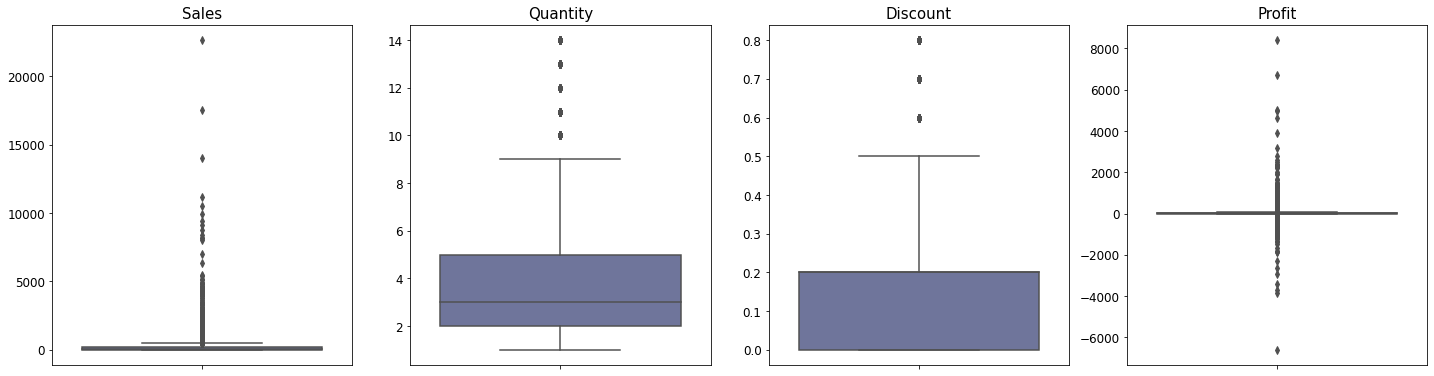

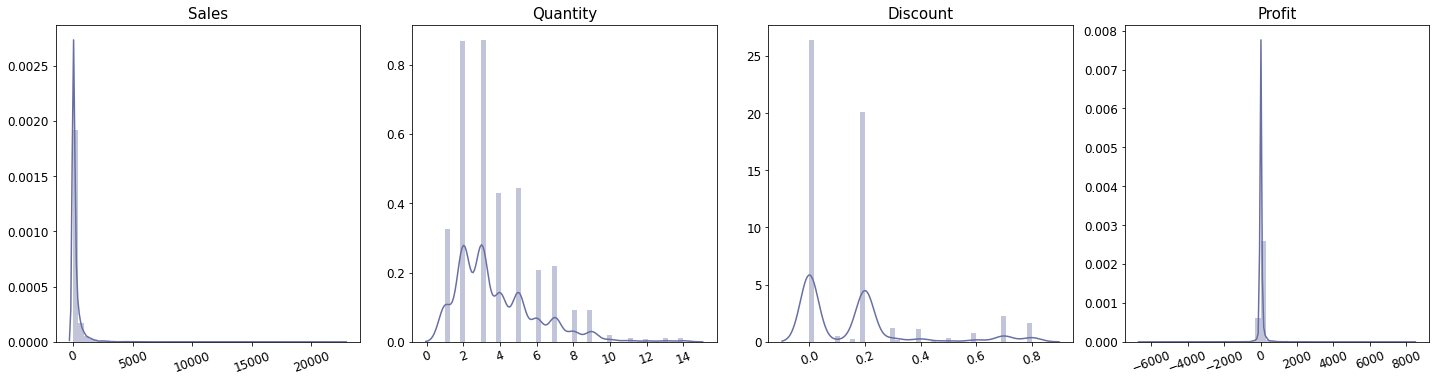

In [11]:
# numerical data
fig = plt.figure(figsize = (25, 25))
i = 1
for col in superstore[numerical].columns:
    plt.subplot(5, 5, i)
    ax = sns.boxplot(y = superstore[col], color ='#676FA3')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    plt.xticks(rotation = 20, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    i += 1
plt.show()


fig = plt.figure(figsize = (25, 25))
i = 1
for col in superstore[numerical].columns:
    plt.subplot(5, 5, i)
    ax = sns.distplot(x = superstore[col], color ='#676FA3')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    plt.xticks(rotation = 20, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    i += 1
plt.show()

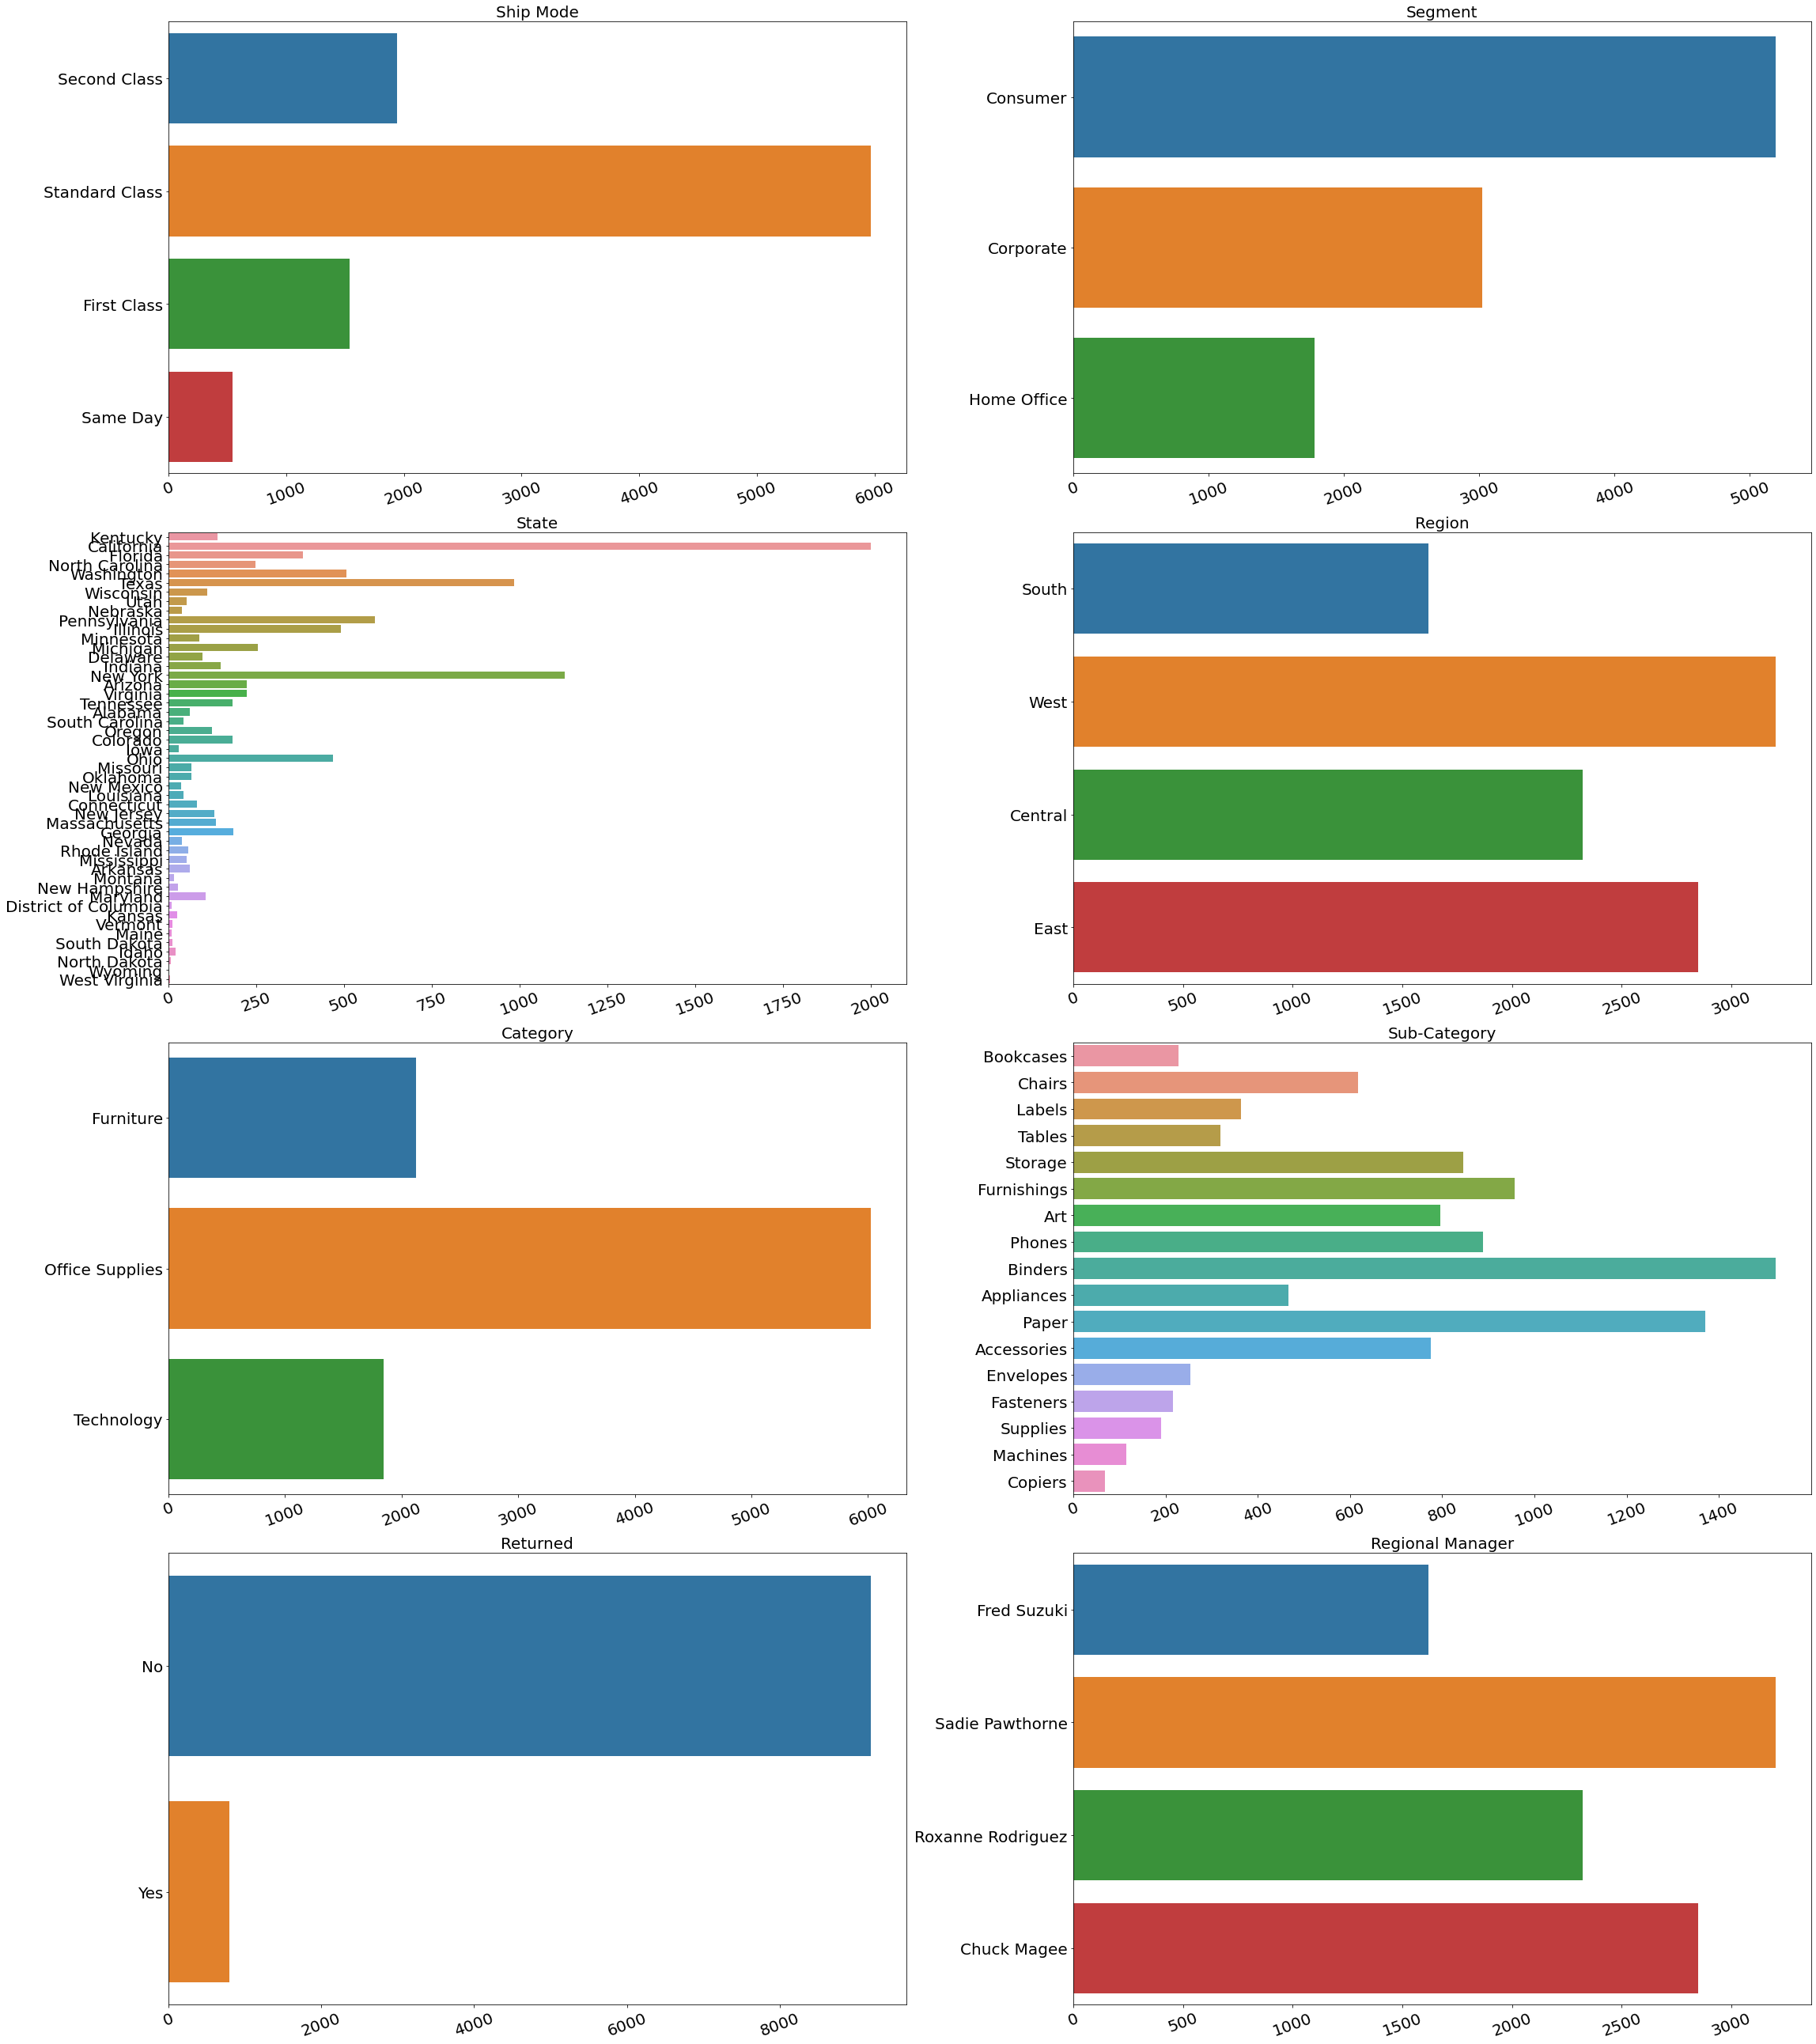

In [12]:
# categorical data
categorical = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category', 'Returned', 'Regional Manager']

fig = plt.figure(figsize = (32, 36))
i = 1
for col in superstore[categorical].columns:
    plt.subplot(4, 2, i)
    ax = sns.countplot(data = superstore[categorical], y = superstore[col])
    
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 20, fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tight_layout()
    i += 1

### Feature extraction

From the dataset we can extract some new features such as year, month, day, weekday/weekend of orders and shipping, unit price and etc.

In [13]:
# create unit price for each product
superstore['Unit Price'] = superstore['Sales']/superstore['Quantity']/(1- superstore['Discount'])

# extract year of order as continuous
superstore['Order Year Cont'] = superstore['Order Date'].apply(lambda x: dt.datetime(x.year, 1, 1 ))

# extract month of order as continuous
superstore['Order Month Cont'] = superstore['Order Date'].apply(lambda x: dt.datetime(x.year, x.month, 1 ))

# extract month of order as discrete
superstore['Order Year'] = superstore['Order Date'].dt.year

# extract month of order as discrete
superstore['Order Month'] = superstore['Order Date'].dt.month

# extract day of week of order
superstore['Order Day'] = superstore['Order Date'].dt.strftime('%A')
superstore['Order Day'] = pd.Categorical(superstore['Order Day'], categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# extract weekend or weekday of order
superstore['Order Weekend/Weekday'] = superstore['Order Date'].apply(lambda x: 'Weekend' if x.weekday() >= 5 else 'Weekday')

There is a useful information to be extracted such as the interval between ordering and shipping and this could be connected to `Ship Mode`. A new column called `Punctuality` is made with these criteria ([source](https://openclassrooms.com/en/courses/5873606-create-dashboards-with-tableau/exercises/3803)):
- `"Same Day"` &rarr; shipping on same day.
- `"First Class"` &rarr; shipping within 1 day.
- `"Second Class"` &rarr; shipping within 3 days
- `"Standard Class"` &rarr; shipping within 6 days.

In [14]:
def punctual_shipping(x):
    if x['Ship Mode'] == 'Same Day':
        if x['Interval Date'] == 0:
            return 'On Time'
        else:
            return 'Late'
    elif x['Ship Mode'] == 'First Class':
        if x['Interval Date'] == 1:
            return 'On Time'
        elif x['Interval Date'] < 1:
            return 'Early'
        else:
            return 'Late'
    elif x['Ship Mode'] == 'Second Class':
        if x['Interval Date'] == 3:
            return 'On Time'
        elif x['Interval Date'] < 3:
            return 'Early'
        else:
            return 'Late'
    elif x['Ship Mode'] == 'Standard Class':
        if x['Interval Date'] == 6:
            return 'On Time'
        elif x['Interval Date'] < 6:
            return 'Early'
        else:
            return 'Late'

In [15]:
# extract day intervals between ordering and shipping
superstore['Interval Date'] = (superstore['Ship Date'] - superstore['Order Date']).dt.days

# extract the punctuality of ship mode
superstore['Punctuality'] = superstore.apply(lambda x: punctual_shipping(x), axis = 1)

## Deep dive EDA

### KPIs across different features

Visualization will be performed with `total_profit` as primary KPI while the secondary KPIs are `total_trx`, `total_sales`, `total_quantity`, and `avg_discount` across different features.

In [16]:
# helper function
def KPIs_performance(groupby, suptitle_name, df, savefig, savefig_name, figure_size = (12, 10)):
    df = df.groupby(groupby).agg(total_trx = ('Row ID', 'count'),
                                 total_sales = ('Sales', 'sum'),
                                 total_quantity = ('Quantity', 'sum'),
                                 avg_discount = ('Discount', 'mean'),
                                 total_profit = ('Profit', 'sum')).reset_index()
    group = groupby[0]
    fig, ax = plt.subplots(figsize = figure_size, nrows = 2, ncols = 2)

    # total_trx
    df = df.sort_values('total_trx', ascending = False)
    ax1 = ax[0][0].twinx()
    sns.barplot(data = df, x = group, y = 'total_trx', 
                ax = ax[0][0], palette = 'viridis', order = df[group])
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax1, color = '#D7503C')
    ax1.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C')
    ax1.axhline(y = 0, color = 'gray', linestyle = '--')
    ax1.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax1.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[0][0].set_ylabel('total_trx', color = '#440154', fontsize = 12)
    ax[0][0].tick_params(axis = 'y', labelcolor = '#440154')
    ax[0][0].set_xticklabels([label for label in df[group]], rotation = 30, ha = 'right', fontsize = 8)
    
    # total_sales
    df = df.sort_values('total_sales', ascending = False)
    ax2 = ax[0][1].twinx()
    sns.barplot(data = df, x = group, y = 'total_sales', 
                ax = ax[0][1], palette = 'viridis', order = df[group])
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax2, color = '#D7503C')
    ax2.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C')
    ax2.axhline(y = 0, color = 'gray', linestyle = '--')
    ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[0][1].set_ylabel('total_sales ($)', color = '#440154', fontsize = 12)
    ax[0][1].tick_params(axis = 'y', labelcolor = '#440154')
    ax[0][1].set_xticklabels([label for label in df[group]], rotation = 30, ha = 'right', fontsize = 8)

    # total_quantity
    df = df.sort_values('total_quantity', ascending = False)
    ax3 = ax[1][0].twinx()
    sns.barplot(data = df, x = group, y = 'total_quantity', 
                ax = ax[1][0], palette = 'viridis', order = df[group])
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax3, color = '#D7503C')
    ax3.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C')
    ax3.axhline(y = 0, color = 'gray', linestyle = '--')
    ax3.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax3.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[1][0].set_ylabel('total_quantity', color = '#440154', fontsize = 12)
    ax[1][0].tick_params(axis = 'y', labelcolor = '#440154')
    ax[1][0].set_xticklabels([label for label in df[group]], rotation = 30, ha = 'right', fontsize = 8)
    
    # avg_discount
    df = df.sort_values('avg_discount', ascending = False)
    ax4 = ax[1][1].twinx()
    sns.barplot(data = df, x = group, y = 'avg_discount', 
                ax = ax[1][1], palette = 'viridis', order = df[group])
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax4, color = '#D7503C')
    ax4.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C')
    ax4.axhline(y = 0, color = 'gray', linestyle = '--')
    ax4.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax4.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[1][1].set_ylabel('avg_discount (%)', color = '#440154', fontsize = 12)
    ax[1][1].tick_params(axis = 'y', labelcolor = '#440154')
    ax[1][1].set_xticklabels([label for label in df[group]], rotation = 30, ha = 'right', fontsize = 8)

    plt.tight_layout()
    plt.suptitle(t = suptitle_name, x = 0.5, y = 1.01)
    if savefig == True:
        plt.savefig(savefig_name, bbox_inches = 'tight')
    plt.show()
    return df

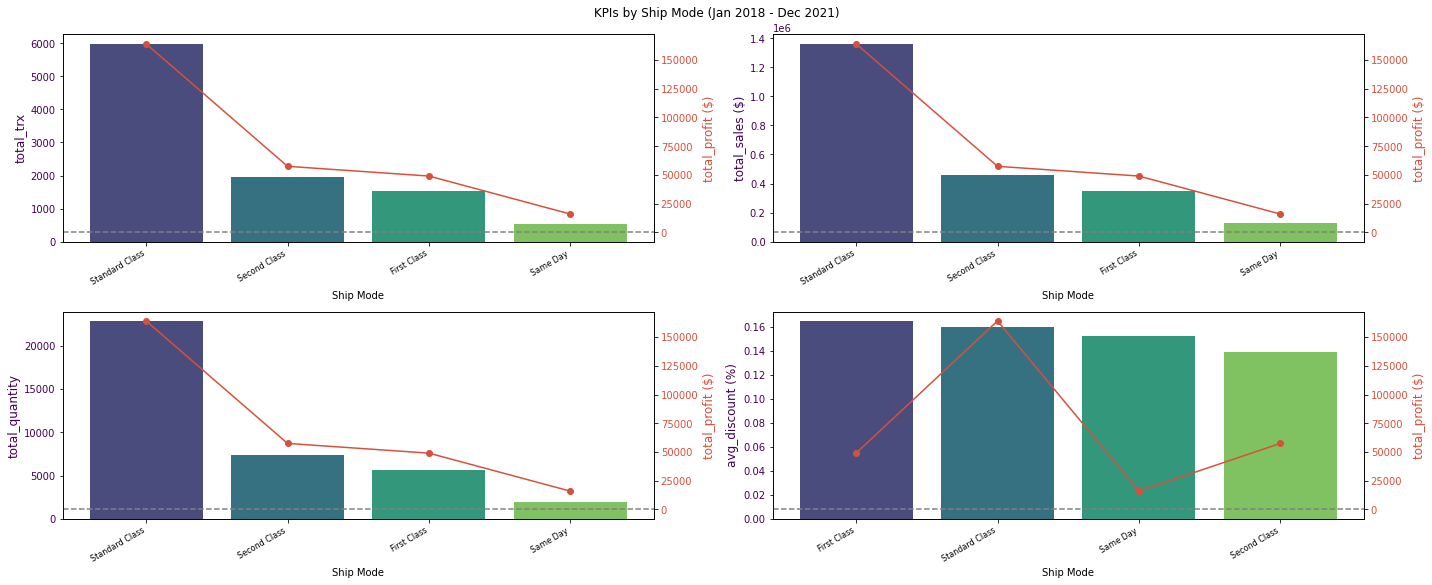

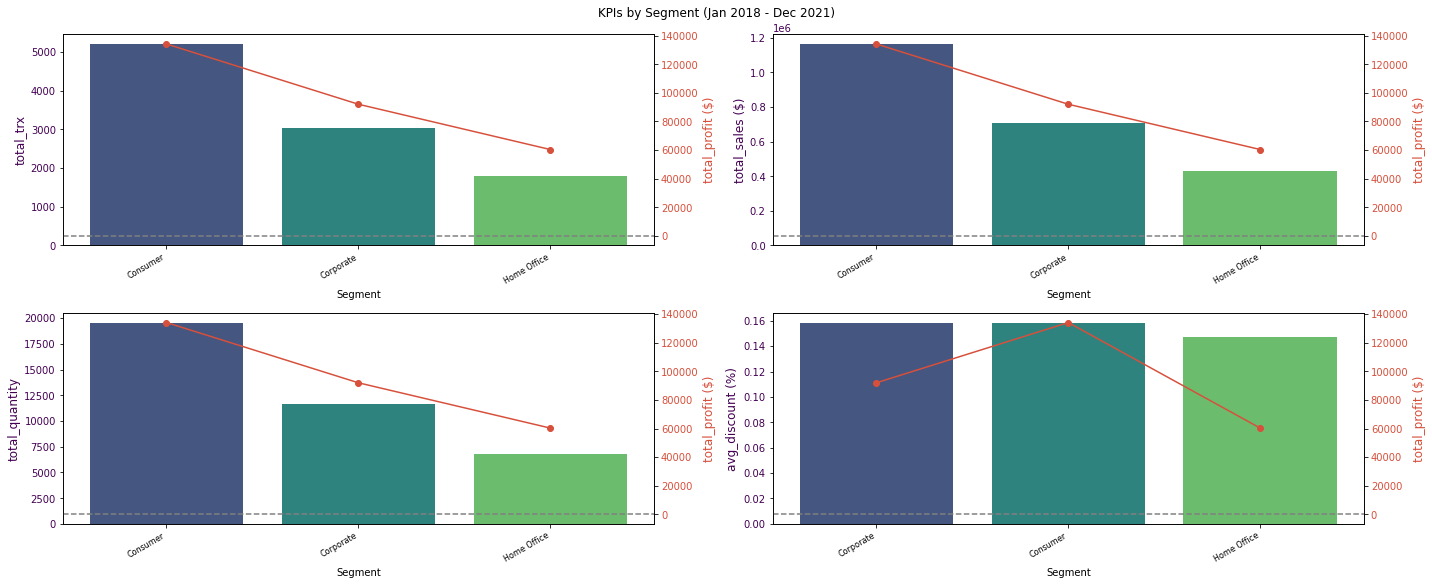

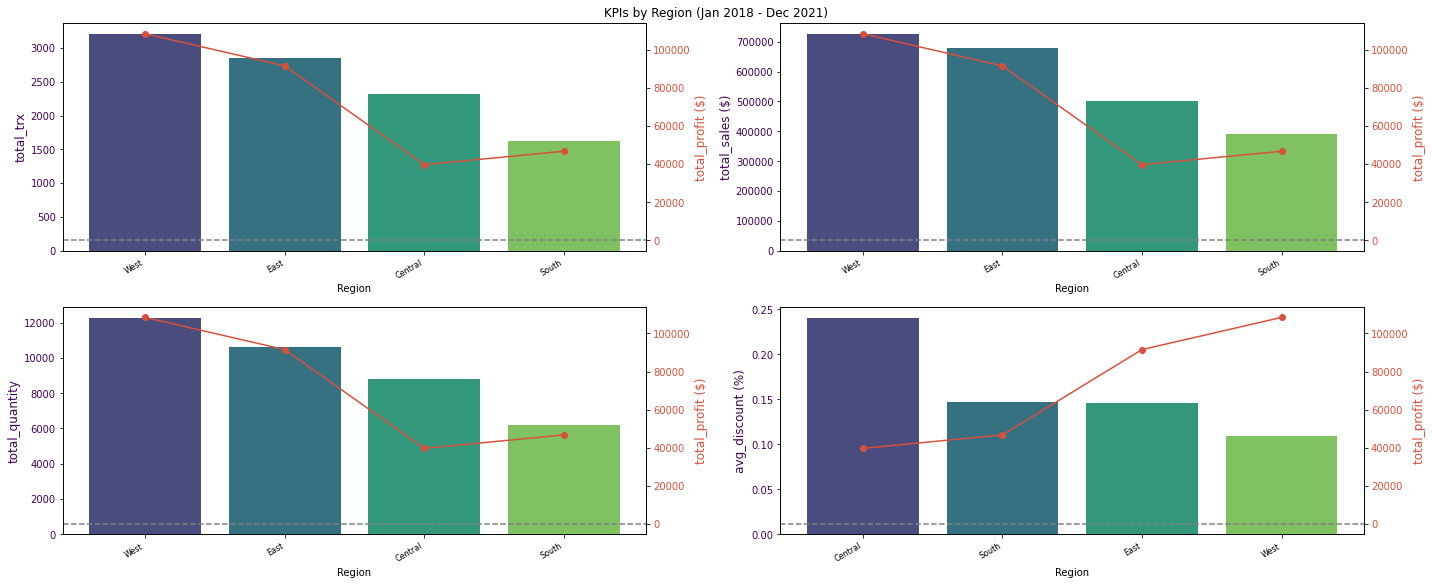

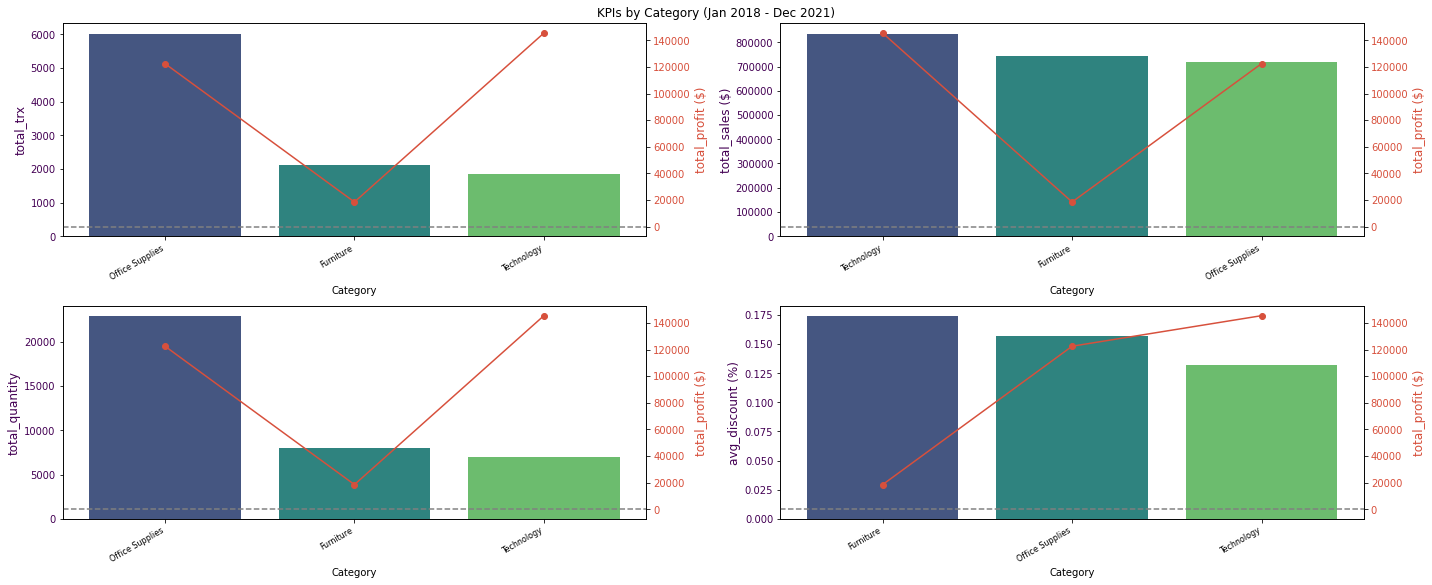

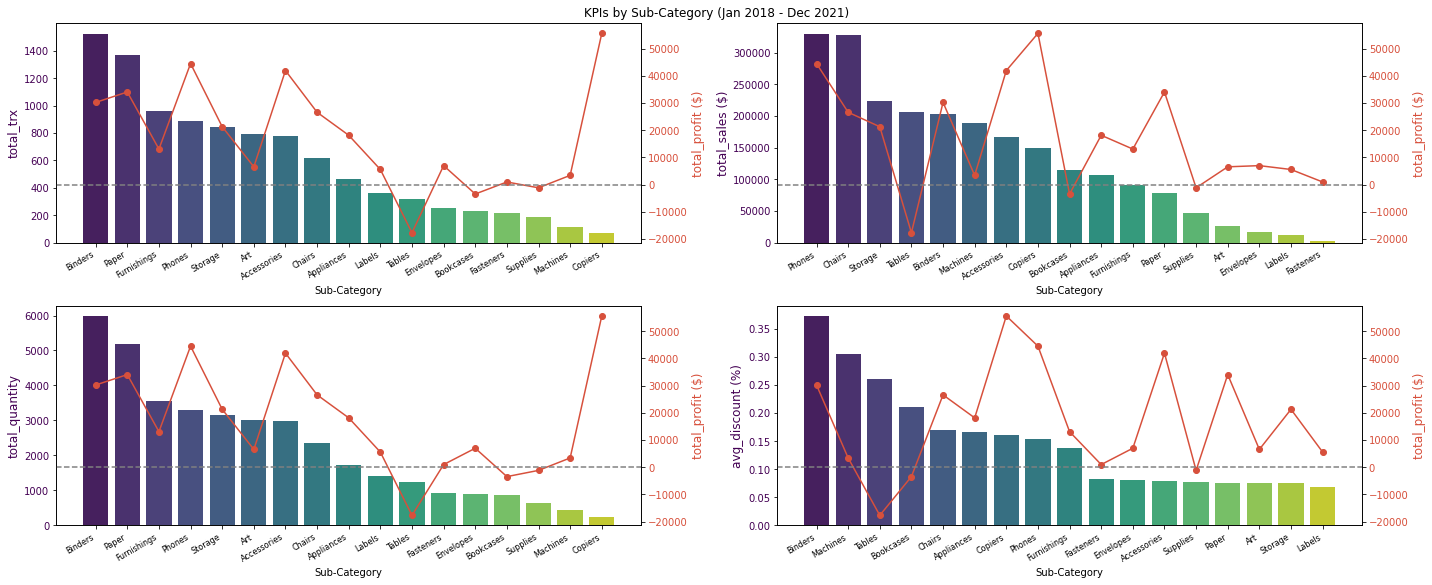

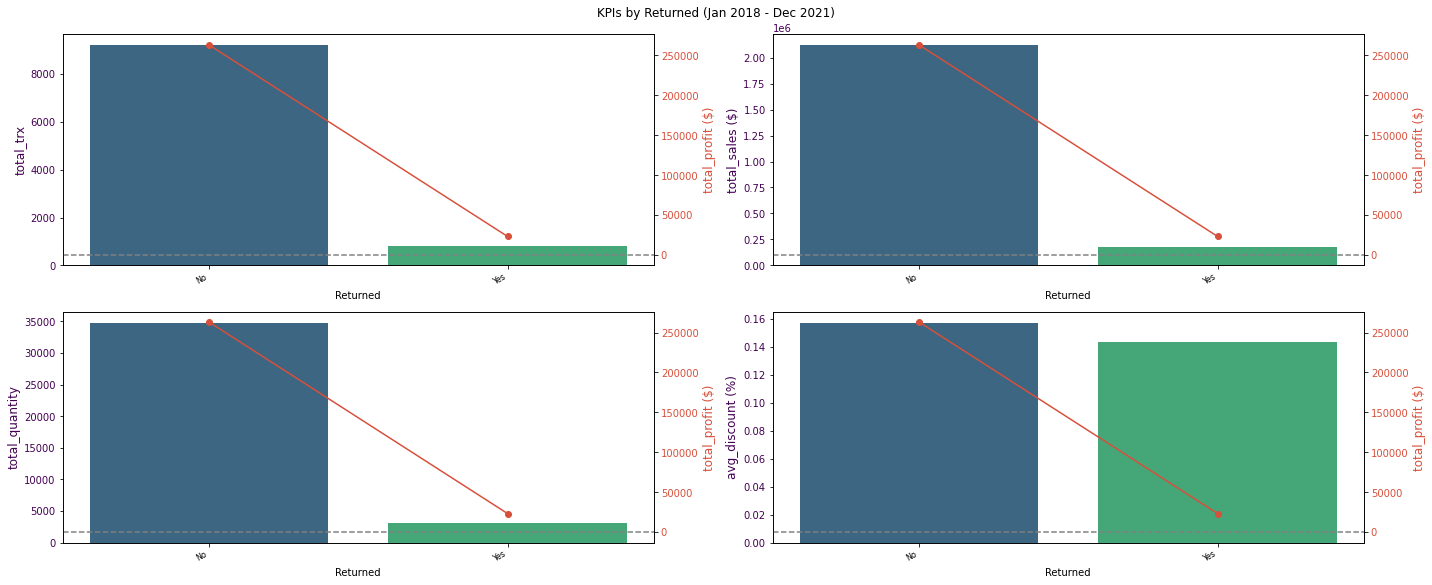

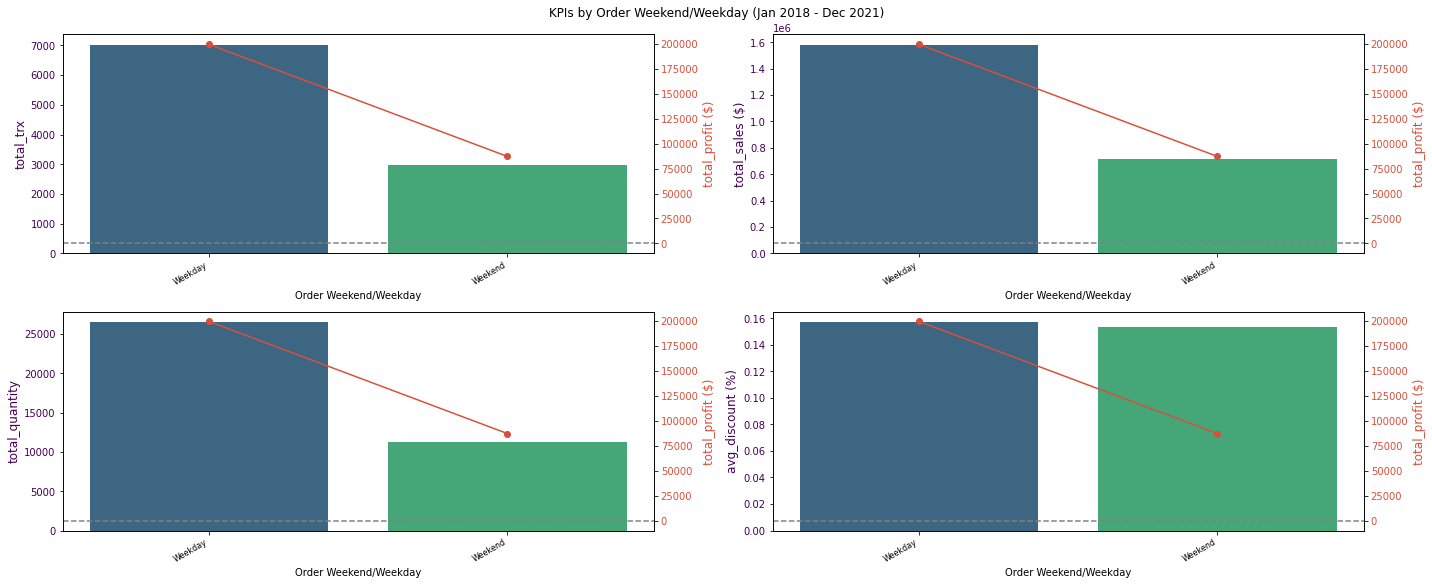

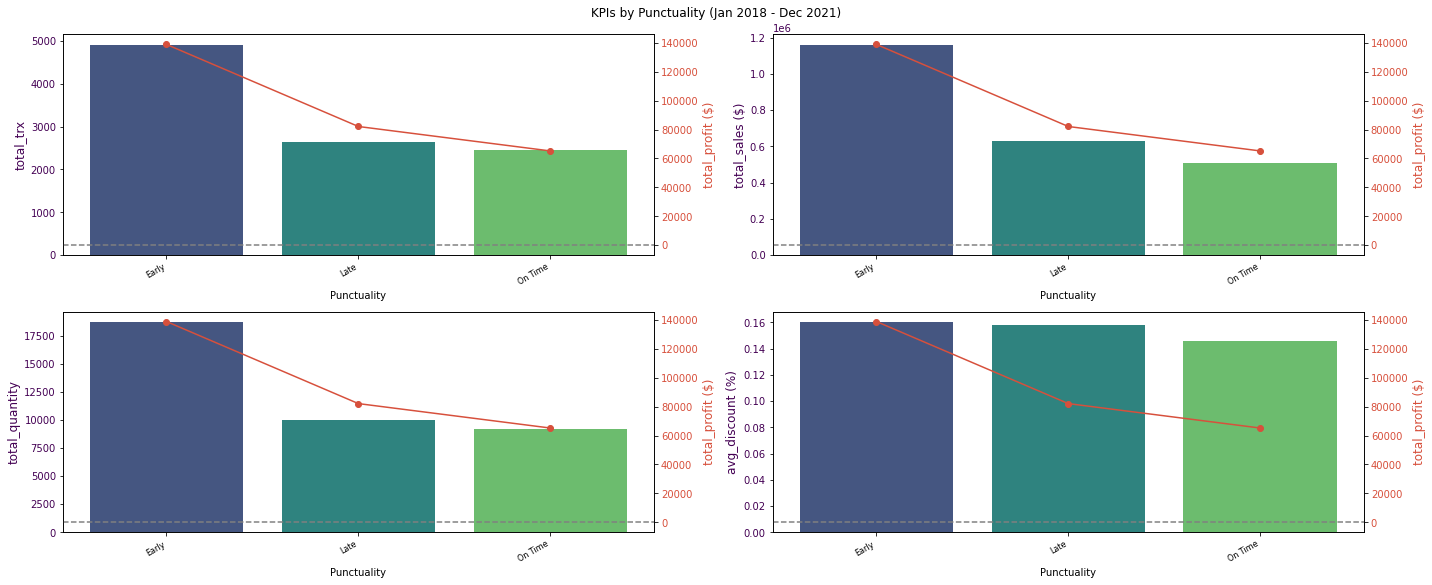

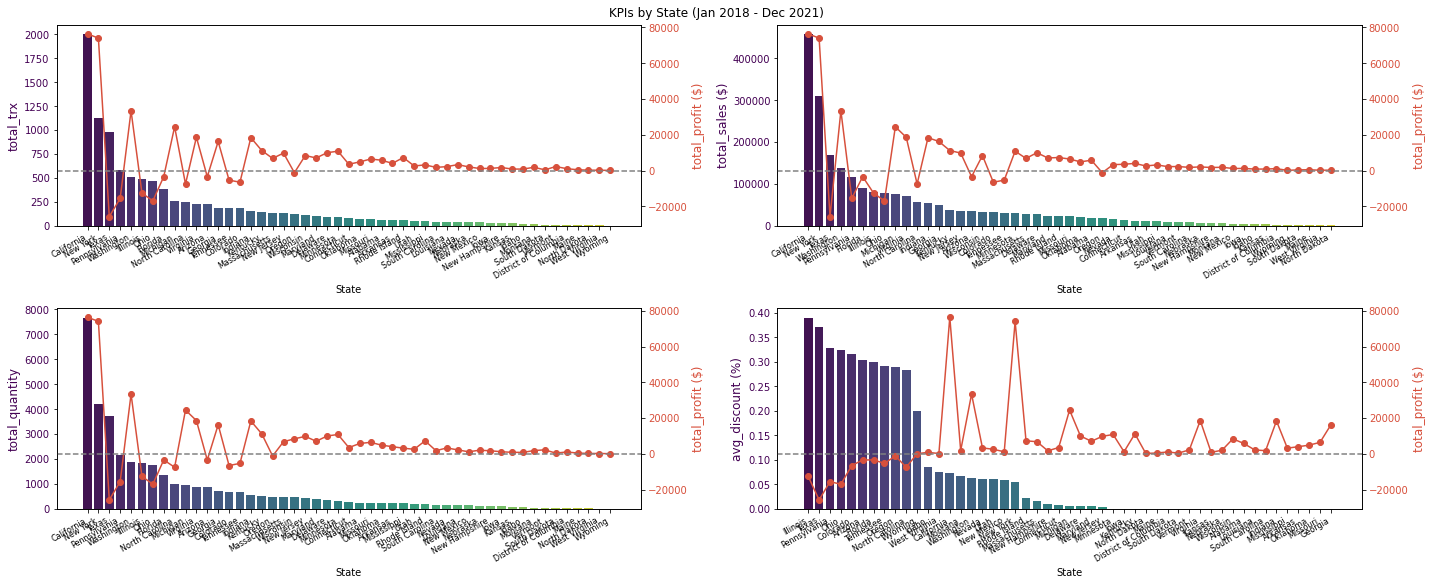

In [17]:
# features to analyze
features = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 
            'Returned', 'Order Weekend/Weekday', 'Punctuality', 'State']
for feature in features:
    KPIs_performance([feature], 
                     suptitle_name = 'KPIs by {} (Jan 2018 - Dec 2021)'.format(feature), 
                     df = superstore, 
                     savefig = False, savefig_name = None, 
                     figure_size = (20, 8))
    print('='*100)

Insights:
- Generally, `total_quantity` & `total_trx` seem to have a high positive relationship where high transactions lead to high quantities and otherwise. This is understandable. 
- `total_quantity`/`total_trx` & `total_profit` and `total_sales` & `total_profit` have positive relationship too (high sales lead to high profits or high transactions lead to high profits), yet this is not always the case for `Category` and `Sub-Category` since these features are more granular (depend on the unit price of product).
- `Ship Mode`:
    - "Standard Class" is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular and may be too costly. Mostly, the high profit comes from "Standard Class". 
- `Segment`:
    - "Consumer" segment is the most profitable then followed by "Corporate" segment. The marketing strategy should always focus on retaining this two segment. The avg discount given for each segment is relatively even.
- `Region`: 
    - "West" and "East" region are the most profitable. This is due to most customers residence are from those two regions. Superstore has to focus in "West" and "East" region and need to develop more the market in "Central" and "South" region. Low profit in "Central" region is affected by high avg discount, Superstore should consider reviewing the marketing strategy on discount rates which resulted in low profit in "Central" region.
- `Category`: 
    - "Technology" is the most profitable category although it has least amount of transactions or quantities. This is because "Technology" products are usually not a daily purchased product (one-off purchase) and it's a long term products for years with high unit price. 
    - "Furniture" is the least profitable category, it may happen because the avg discount given is too high. 
    - "Office Supplies" is the second profitable category with highest demand. Superstore has to ensure their stock for "Office Supplies" category is always available over time.
- `Sub-Category`: 
    - Top 5 most profitable sub-category are "Copiers", "Phones", "Accessories", "Paper", and "Binders". The marketing strategy has to focus on marketing these products, especially for high demand products ("Paper" and "Binders"). These products are good for cross-selling or bundling them to increase the profit, sales, and demand on low performance sub-category such as "Bookcases".
    - Sub category such as "Tables", "Bookcases", and "Machines" are the loss-making sub-category (close to zero profit or negative profit) which have high avg discount and low total quantity. This might indicate the marketing strategy of giving high avg discount for a low demand product to increase the demand does not help much. Superstore should consider another marketing strategy or remove this product catalogue since it might not fit for the target market (also for "Fasteners" and "Supplies").
- `Returned`:
    - Returned orders are due to relatively low avg discount.
- `Order Weekend/Weekday`:
    - Most profit makes on the weekday and this is reasonable since weekday has 5 days. The avg discount relatively even between weekend and weekday.
- `Punctuality`:
    - Almost 50% of shipments is "Early" and this is good for increasing the customers satisfaction.
- `State`:
    - The KPIs is not even distributed.
    - California and New York are the most profitable states.

### Specific questions

#### What are top 10 products with the most number of transactions, sales, and  discount (and how is the total profit profile)?

- From the top 10 most number of transactions, we can see that Staple Envelope, Easy-Staple Paper, and Staples are having high amount of transactions compared to the other. The product development team can make product bundling based on this three product or apply cross-selling strategy to increase profit at low order products.
- From the top 10 total sales, we can see that high amount on total sale doesn't always lead to a profit but relatively lead to a profit. Most of the high amount of total sales come from `"Technology"` `Category`.
- From the top 10 avg discounts, we can see that high amount on discounts lead to a loss and dominantly come from `"Technology"` `Category`. The superstore manager have to be more careful and wise in determining the discount of a product especially high price products.

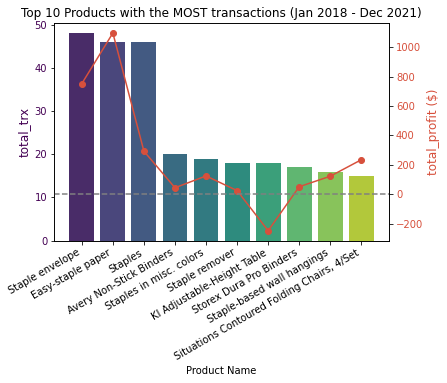

In [18]:
# top 10 products by the transactions
top_10_product = superstore.groupby(['Product Name']).agg(total_trx = ('Order ID','count'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'total_trx', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_product, x = 'Product Name', y = 'total_trx', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_product, x = 'Product Name', y = 'total_profit', ax = ax2, color = '#D7503C')
ax2.scatter(top_10_product['Product Name'], top_10_product['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_product['Product Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Product Name', fontsize = 10)
ax1.set_ylabel('total_trx', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Products with the MOST transactions (Jan 2018 - Dec 2021)')       # edit
plt.show()

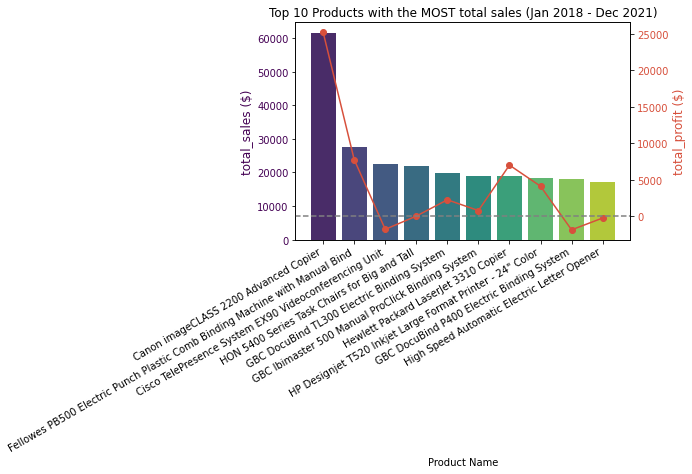

In [19]:
# top 10 products by the total sales
top_10_product = superstore.groupby(['Product Name']).agg(total_sales = ('Sales','sum'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'total_sales', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_product, x = 'Product Name', y = 'total_sales', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_product, x = 'Product Name', y = 'total_profit', ax = ax2, color = '#D7503C')
ax2.scatter(top_10_product['Product Name'], top_10_product['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_product['Product Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Product Name', fontsize = 10)            
ax1.set_ylabel('total_sales ($)', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Products with the MOST total sales (Jan 2018 - Dec 2021)') # edit
plt.show()

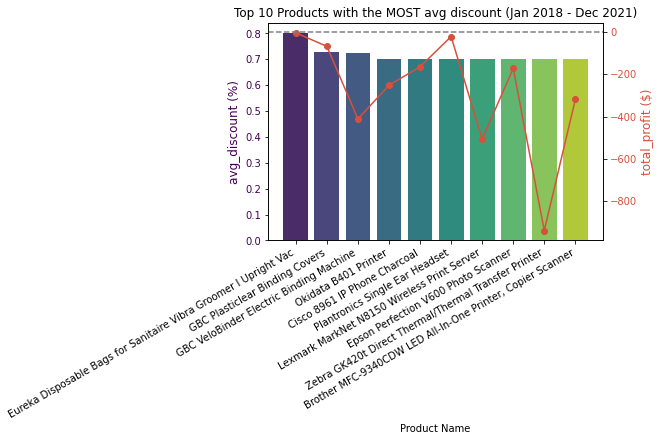

In [20]:
# top 10 products by the avg discount given
top_10_product = superstore.groupby(['Product Name']).agg(avg_discount = ('Discount','mean'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'avg_discount', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_product, x = 'Product Name', y = 'avg_discount', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_product, x = 'Product Name', y = 'total_profit', ax = ax2, color = '#D7503C') 
ax2.scatter(top_10_product['Product Name'], top_10_product['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_product['Product Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Product Name', fontsize = 10)
ax1.set_ylabel('avg_discount (%)', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Products with the MOST avg discount (Jan 2018 - Dec 2021)')                 # edit
plt.show()

#### Who are top 10 customers with the most number of transactions, money spent, and discount (and how is the total profit profile)?

- From the top 10 transactions of customers, the distribution relatively even and high transactions per customer tend to give a profit.
- From the top 10 money spend of customers, high spenders relatively give high profit.
- From the top 10 discounts, high discount given to a customers lead to a loss.

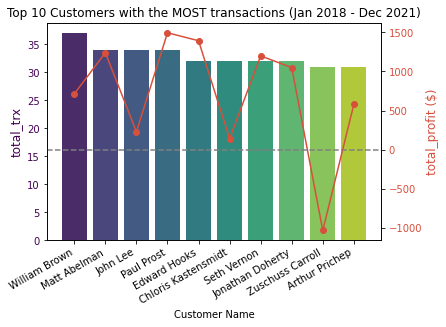

In [21]:
# top 10 customers by the transactions
top_10_customer = superstore.groupby(['Customer Name']).agg(total_trx = ('Order ID','count'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'total_trx', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_customer, x = 'Customer Name', y = 'total_trx', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_customer, x = 'Customer Name', y = 'total_profit', ax = ax2, color = '#D7503C') 
ax2.scatter(top_10_customer['Customer Name'], top_10_customer['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_customer['Customer Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Customer Name', fontsize = 10)
ax1.set_ylabel('total_trx', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Customers with the MOST transactions (Jan 2018 - Dec 2021)')              # edit
plt.show()

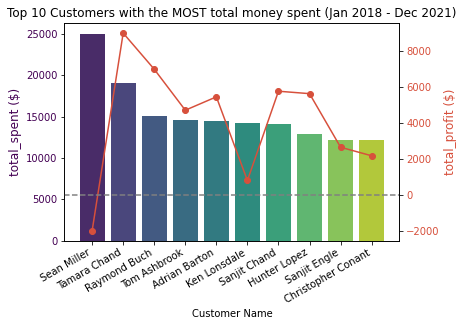

In [22]:
# top 10 customers by the total money spend
top_10_customer = superstore.groupby(['Customer Name']).agg(total_spend = ('Sales','sum'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'total_spend', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_customer, x = 'Customer Name', y = 'total_spend', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_customer, x = 'Customer Name', y = 'total_profit', ax = ax2, color = '#D7503C') 
ax2.scatter(top_10_customer['Customer Name'], top_10_customer['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_customer['Customer Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Customer Name', fontsize = 10)
ax1.set_ylabel('total_spent ($)', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Customers with the MOST total money spent (Jan 2018 - Dec 2021)')              # edit
plt.show()

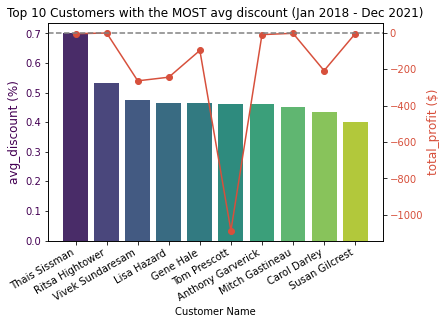

In [23]:
# top 10 customers by the avg discount given
top_10_customer = superstore.groupby(['Customer Name']).agg(avg_discount = ('Discount','mean'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'avg_discount', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_customer, x = 'Customer Name', y = 'avg_discount', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_customer, x = 'Customer Name', y = 'total_profit', ax = ax2, color = '#D7503C') 
ax2.scatter(top_10_customer['Customer Name'], top_10_customer['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_customer['Customer Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Customer Name', fontsize = 10)
ax1.set_ylabel('avg_discount (%)', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Customers with the MOST avg discount (Jan 2018 - Dec 2021)')              # edit
plt.show()

#### How many distinct products sold? How is their price market place distribution?

- There are 1849 products sold with the most price market place at 0.99 to 1000 USD.

Product Name  Unit Price
2761                          Maxell 4.7GB DVD-R 5/Pack        0.99
2779                          Maxell 4.7GB DVD+R 5/Pack        0.99
4871                                    OIC Thumb-Tacks        1.14
339        OIC Binder Clips, Mini, 1/4" Capacity, Black        1.24
267                                 Bagged Rubber Bands        1.26
...                                                 ...         ...
318   Canon imageCLASS MF7460 Monochrome Digital Las...     1995.99
3151          Cubify CubeX 3D Printer Double Head Print     2999.99
2623              Canon imageCLASS 2200 Advanced Copier     3499.99
683           Cubify CubeX 3D Printer Triple Head Print     3999.99
2697  Cisco TelePresence System EX90 Videoconferenci...     7546.16

[1849 rows x 2 columns]

<Figure size 432x288 with 0 Axes>

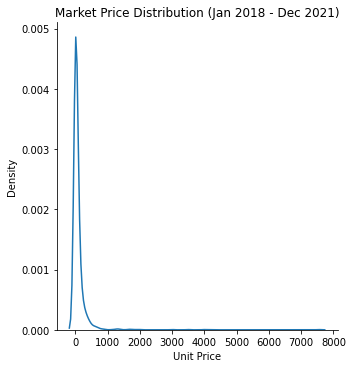

In [24]:
distinct_products = superstore[['Product Name', 'Unit Price']].drop_duplicates(subset = ['Product Name'])
display(distinct_products.sort_values('Unit Price'))
plt.figure(figsize=(6, 4))
sns.displot(data = distinct_products, x='Unit Price', kind = 'kde')
plt.title('Market Price Distribution (Jan 2018 - Dec 2021)')
plt.show()

#### Which region has the distribution of customers with the high money spent, profit, discount, and transaction?

From 50th percentile (median) of the boxplot and the box of the boxplot,
- West region has the highest total profit distribution with the lowest discount and the highest money spent (also total trx) followed by the East region
- Central region has the lowest total profit distribution with the highest discount and the lowest money spent (also total trx) followed by the South region.
- Theses 4 metrics might be associated each other. High on `total_profit` is due to low on `avg_discount`, high on`total_spend`, high on `total_trx`, otherwise. But is it correlated each other? Let's check with pearson correlation!
- We should deeply evaluate and more focus to develope the market in Central and South region of United States. These are the weakest region.

West       686
East       674
Central    629
South      512
Name: Region, dtype: int64


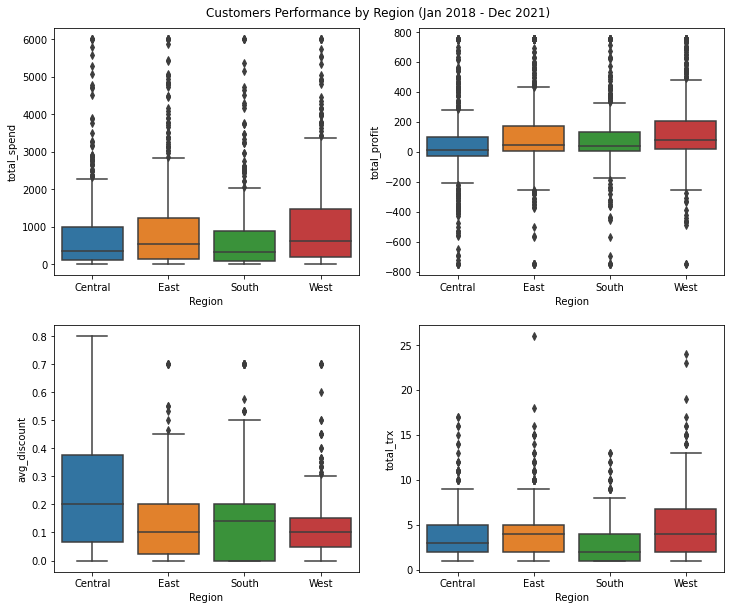

In [25]:
# create KPI based on region
fig, ax = plt.subplots(figsize = (12, 10), nrows = 2, ncols = 2)
region_profile = superstore.groupby(['Region', 'Customer Name']).agg(total_spend = ('Sales', 'sum')).reset_index()
print(region_profile['Region'].value_counts())
region_profile['total_spend'] = region_profile['total_spend'].clip(upper = 6000)
sns.boxplot(data = region_profile, x = 'Region', y = 'total_spend', ax = ax[0][0])

region_profile = superstore.groupby(['Region', 'Customer Name']).agg(total_profit = ('Profit', 'sum')).reset_index()
region_profile['total_profit'] = region_profile['total_profit'].clip(upper = 750)
region_profile['total_profit'] = region_profile['total_profit'].clip(lower = -750)
sns.boxplot(data = region_profile, x = 'Region', y = 'total_profit', ax = ax[0][1])

region_profile = superstore.groupby(['Region', 'Customer Name']).agg(avg_discount = ('Discount', 'mean')).reset_index()
sns.boxplot(data = region_profile, x = 'Region', y = 'avg_discount', ax = ax[1][0])

region_profile = superstore.groupby(['Region', 'Customer Name']).agg(total_trx = ('Order ID', 'count')).reset_index()
sns.boxplot(data = region_profile, x = 'Region', y = 'total_trx', ax = ax[1][1])
plt.suptitle('Customers Performance by Region (Jan 2018 - Dec 2021)', x = 0.5, y = 0.91)
plt.show()

#### How is the correlation between profit, sales, quantity, and discount?

- `Profit` has weak negative correlation with `Discount`.
- `Profit` has intermediate positive correlation with `Sales`.
- `Profit` has a very weak positive correlation with `Quantity`, we can ignore this.

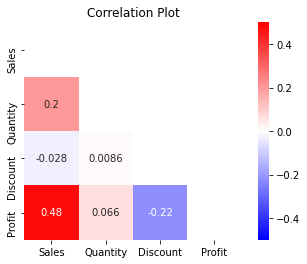

In [26]:
corr = superstore[numerical].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, square = True, annot = True, cmap = 'bwr', vmin = -0.5, vmax = 0.5)
plt.title('Correlation Plot')
plt.show()

#### How is the monthly and yearly total profit based on number of transactions, buyers, sales, and discount over year?

- It looks like there is a seasonality trend across the year in `total_trx`, `total_buyer`, and `total_sales`. Over the year, the lowest performance was happening in January and February (beginning of the month) and the highest performance was happening in November and December (end of the month).
- The trends of `total_trx`, `total_buyer`, and `total_sales` seems increasing over year, Superstore have to prepare for the end of the month in 2022 to increase the stock of the most purchased products so understocked product would not happen.
- There is a trend where high `avg_discount` lead to low `total_profit` and otherwise.

In [27]:
# helper function
def time_series_performance(groupby, suptitle_name, df, savefig, savefig_name, figure_size = (12, 10)):
    """a function to plot KPI time series analysis group by specified "group" time of superstore dataframe "df" with title "suptitle_name"
    """
    df = df.groupby(groupby).agg(total_trx = ('Row ID', 'count'), 
                                 total_buyer = ('Customer ID', 'nunique'),
                                 total_sales = ('Sales', 'sum'),
                                 avg_discount = ('Discount', 'mean'),
                                 total_profit = ('Profit', 'sum')).reset_index()
    group = groupby[0]
    fig, ax = plt.subplots(figsize = figure_size, nrows = 4, ncols = 1)
    
    # total_trx
    ax1 = ax[0].twinx()
    sns.lineplot(data = df, x = group, y = 'total_trx', ax = ax[0], color = '#440154')
    ax[0].scatter(df[group], df['total_trx'], marker = 'x', color = '#440154', s = 30)
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax1, color = '#D7503C', alpha = 0.5)
    ax1.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C', s = 10, alpha = 0.5)
    ax1.axhline(y = 0, color = 'gray', linestyle = '--')
    ax1.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax1.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[0].set_ylabel('total_trx', color = '#440154', fontsize = 12)
    ax[0].tick_params(axis = 'y', labelcolor = '#440154')
    
    # total_buyer
    ax2 = ax[1].twinx()
    sns.lineplot(data = df, x = group, y = 'total_buyer', ax = ax[1], color = '#440154')
    ax[1].scatter(df[group], df['total_buyer'], marker = 'x', color = '#440154', s = 30)
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax2, color = '#D7503C', alpha = 0.5)
    ax2.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C', s = 10, alpha = 0.5)
    ax2.axhline(y = 0, color = 'gray', linestyle = '--')
    ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[1].set_ylabel('total_buyer', color = '#440154', fontsize = 12)
    ax[1].tick_params(axis = 'y', labelcolor = '#440154')
    
    # total_sales
    ax3 = ax[2].twinx()
    sns.lineplot(data = df, x = group, y = 'total_sales', ax = ax[2], color = '#440154')
    ax[2].scatter(df[group], df['total_sales'], marker = 'x', color = '#440154', s = 30)
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax3, color = '#D7503C', alpha = 0.5)
    ax3.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C', s = 10, alpha = 0.5)
    ax3.axhline(y = 0, color = 'gray', linestyle = '--')
    ax3.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax3.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[2].set_ylabel('total_sales ($)', color = '#440154', fontsize = 12)
    ax[2].tick_params(axis = 'y', labelcolor = '#440154')
    
    # avg_discount
    ax4 = ax[3].twinx()
    sns.lineplot(data = df, x = group, y = 'avg_discount', ax = ax[3], color = '#440154')
    ax[3].scatter(df[group], df['avg_discount'], marker = 'x', color = '#440154', s = 30)
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax4, color = '#D7503C', alpha = 0.5)
    ax4.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C', s = 10, alpha = 0.5)
    plt.tight_layout()
    ax4.axhline(y = 0, color = 'gray', linestyle = '--')
    ax4.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax4.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[3].set_ylabel('avg_discount (%)', color = '#440154', fontsize = 12)
    ax[3].tick_params(axis = 'y', labelcolor = '#440154')

    # fig.autofmt_xdate(rotation= 30)
    plt.suptitle(t = suptitle_name, x = 0.5,y = 1.01)
    if savefig == True:
        plt.savefig(savefig_name, bbox_inches = 'tight')
    plt.show()
    return df

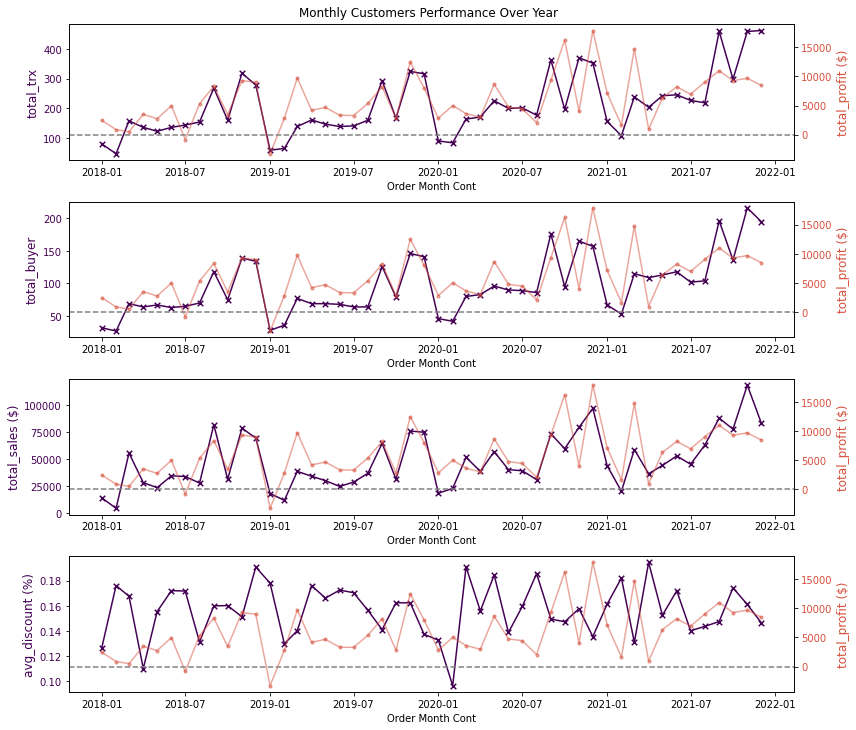

In [28]:
_ = time_series_performance(groupby = ['Order Month Cont'], 
                            suptitle_name = 'Monthly Customers Performance Over Year', 
                            df = superstore,
                            savefig = False, savefig_name = None,
                            figure_size = (12, 10))

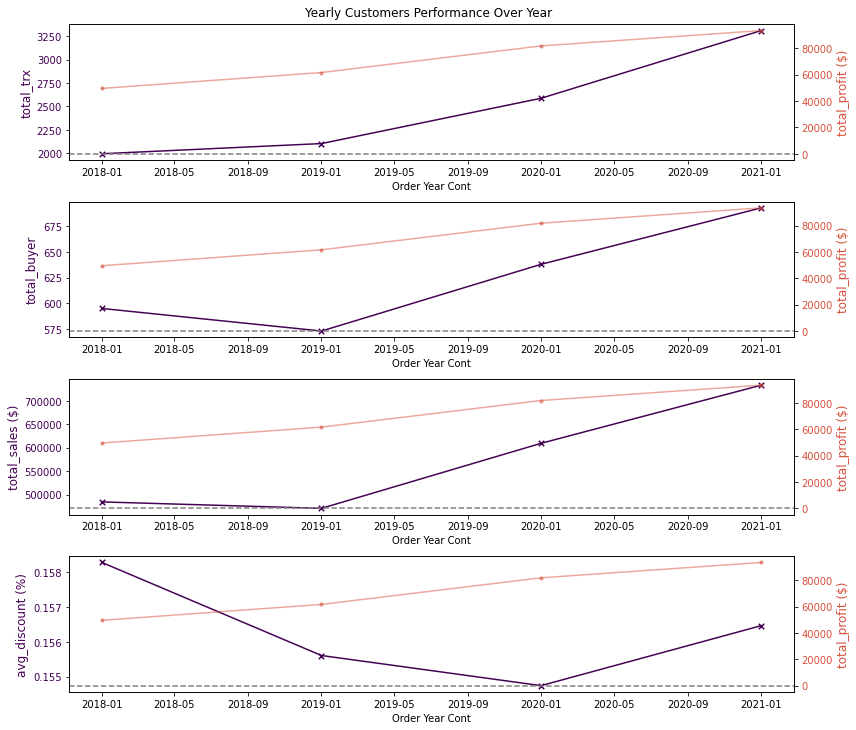

In [29]:
_ = time_series_performance(groupby = ['Order Year Cont'], 
                            suptitle_name = 'Yearly Customers Performance Over Year', 
                            df = superstore,
                            savefig = False, savefig_name = None,
                            figure_size = (12, 10))

#### How is the day of the week avg profit based on number of transactions, sales, and discount in last 2 years (2021 and 2020)?

- The performance from the last 2 years are identical where most of orders (`total_trx` or `total_buyer`) are made on Tuesday to Saturday while the least on Sunday and Monday (also the `total_sales` and `total_profit`).
- Days with low performances (Sunday and Monday) seem likely due to low `avg_discount` rate on that days.
- We should more focus on making marketing strategy to increase the order rates on Sunday and Monday.

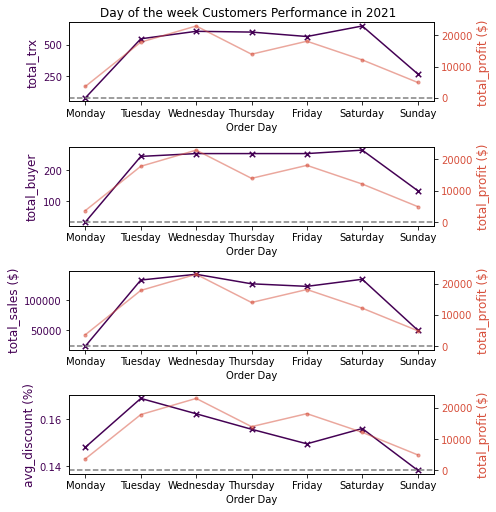

In [30]:
_ = time_series_performance(groupby = ['Order Day'], 
                            suptitle_name = 'Day of the week Customers Performance in 2021', 
                            df = superstore[superstore['Order Year'] == 2021],
                            savefig = False, savefig_name = None,
                            figure_size = (7, 7))

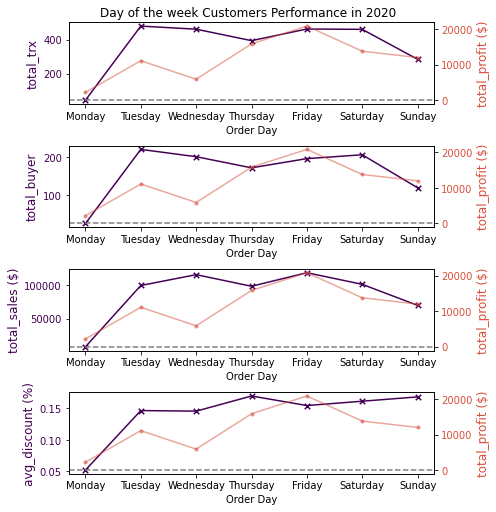

In [31]:
_ = time_series_performance(groupby = ['Order Day'], 
                            suptitle_name = 'Day of the week Customers Performance in 2020', 
                            df = superstore[superstore['Order Year'] == 2020],
                            savefig = False, savefig_name = None,
                            figure_size = (7, 7))

#### How is the monthly distribution of product quantity based on category and sub-category over year?

- Over the year, "Binders" and "Paper" are likely to be the most purchased categories every month.

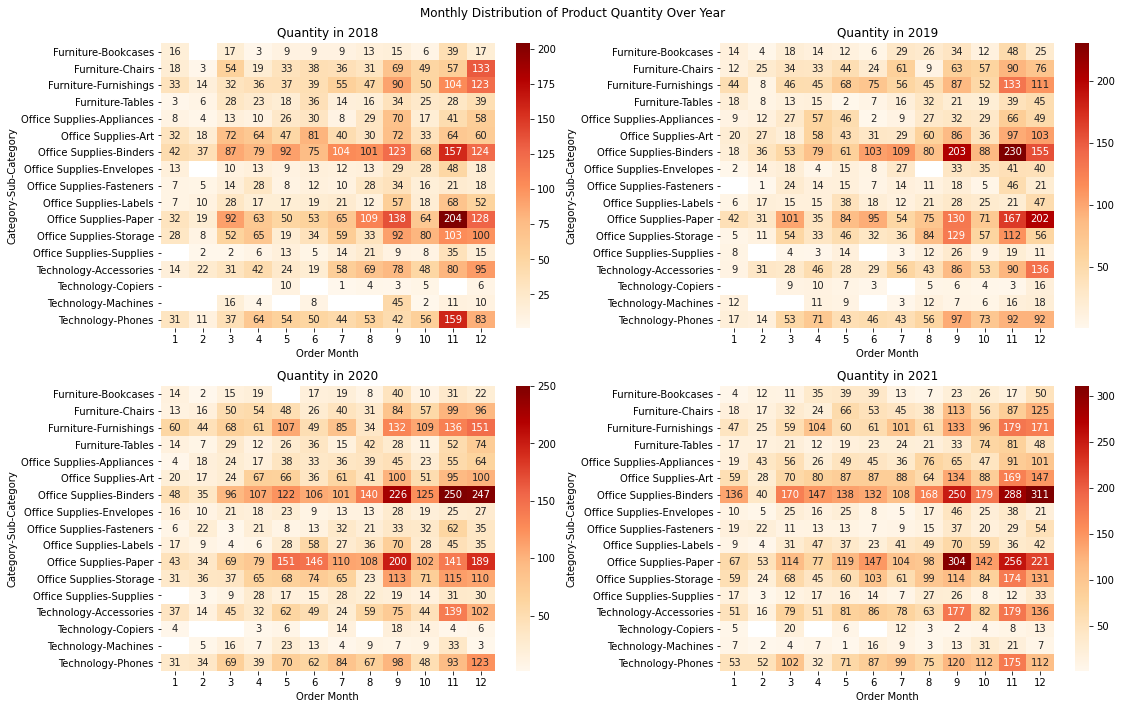

In [32]:
products_over_month = superstore.pivot_table(index = ['Order Year', 'Category', 'Sub-Category'],
                                             values = ['Quantity'],
                                             columns = ['Order Month'], aggfunc = 'sum')

# plot heatmap
fig, ax = plt.subplots(figsize = (16, 10), nrows = 2, ncols = 2)
sns.heatmap(products_over_month.loc[(2018), ('Quantity')], annot = True, cmap = 'OrRd', fmt = '.0f', 
            ax = ax[0][0])
sns.heatmap(products_over_month.loc[(2019), ('Quantity')], annot = True, cmap = 'OrRd', fmt = '.0f', 
            ax = ax[0][1])
sns.heatmap(products_over_month.loc[(2020), ('Quantity')], annot = True, cmap = 'OrRd', fmt = '.0f', 
            ax = ax[1][0])
sns.heatmap(products_over_month.loc[(2021), ('Quantity')], annot = True, cmap = 'OrRd', fmt = '.0f', 
            ax = ax[1][1])
ax[0][0].set_title('Quantity in 2018')
ax[0][1].set_title('Quantity in 2019')
ax[1][0].set_title('Quantity in 2020')
ax[1][1].set_title('Quantity in 2021')
plt.suptitle('Monthly Distribution of Product Quantity Over Year')
plt.tight_layout()
plt.show()

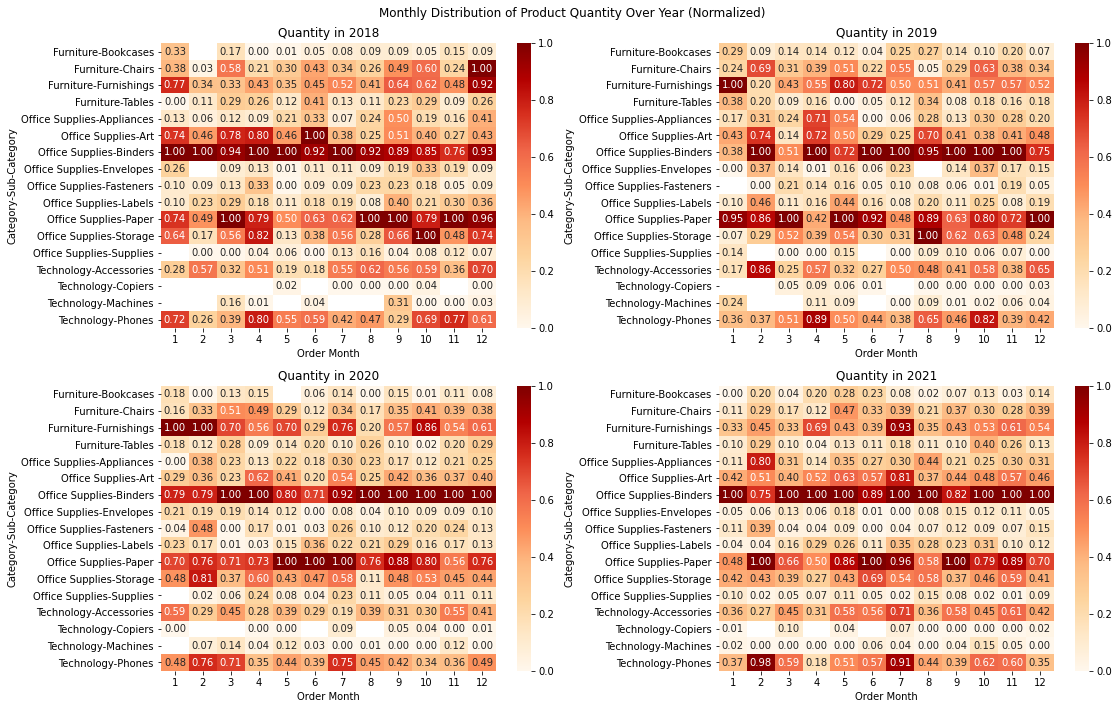

In [33]:
# normalized
normalize_2018 = (products_over_month.loc[(2018), ('Quantity')] - products_over_month.loc[(2018), ('Quantity')].min()) / \
                 (products_over_month.loc[(2018), ('Quantity')].max() - products_over_month.loc[(2018), ('Quantity')].min())

normalize_2019 = (products_over_month.loc[(2019), ('Quantity')] - products_over_month.loc[(2019), ('Quantity')].min()) / \
                 (products_over_month.loc[(2019), ('Quantity')].max() - products_over_month.loc[(2019), ('Quantity')].min())

normalize_2020 = (products_over_month.loc[(2020), ('Quantity')] - products_over_month.loc[(2020), ('Quantity')].min()) / \
                 (products_over_month.loc[(2020), ('Quantity')].max() - products_over_month.loc[(2020), ('Quantity')].min())

normalize_2021 = (products_over_month.loc[(2021), ('Quantity')] - products_over_month.loc[(2021), ('Quantity')].min()) / \
                 (products_over_month.loc[(2021), ('Quantity')].max() - products_over_month.loc[(2021), ('Quantity')].min())

# plot heatmap
fig, ax = plt.subplots(figsize = (16, 10), nrows = 2, ncols = 2)
sns.heatmap(normalize_2018, annot = True, cmap = 'OrRd', fmt = '.2f', 
            ax = ax[0][0])
sns.heatmap(normalize_2019, annot = True, cmap = 'OrRd', fmt = '.2f', 
            ax = ax[0][1])
sns.heatmap(normalize_2020, annot = True, cmap = 'OrRd', fmt = '.2f', 
            ax = ax[1][0])
sns.heatmap(normalize_2021, annot = True, cmap = 'OrRd', fmt = '.2f', 
            ax = ax[1][1])
ax[0][0].set_title('Quantity in 2018')
ax[0][1].set_title('Quantity in 2019')
ax[1][0].set_title('Quantity in 2020')
ax[1][1].set_title('Quantity in 2021')
plt.suptitle('Monthly Distribution of Product Quantity Over Year (Normalized)')
plt.tight_layout()
plt.show()

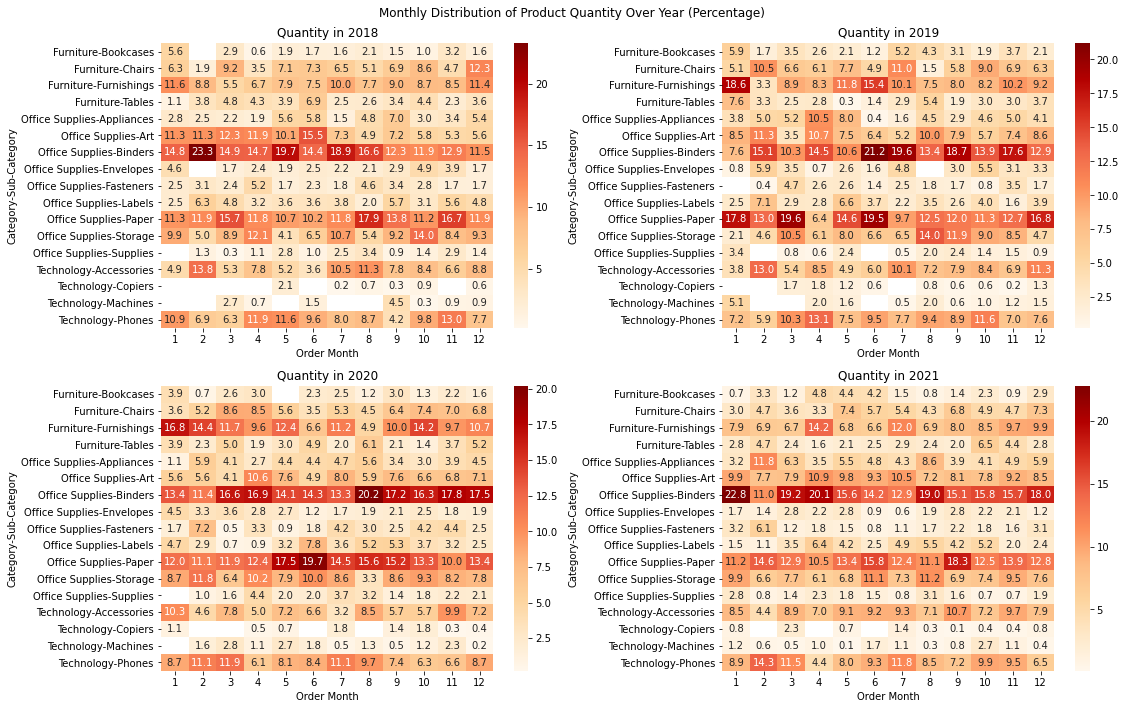

In [34]:
# percentage
percentage_2018 = products_over_month.loc[(2018), ('Quantity')]/products_over_month.loc[(2018), ('Quantity')].sum()*100

percentage_2019 = products_over_month.loc[(2019), ('Quantity')]/products_over_month.loc[(2019), ('Quantity')].sum()*100

percentage_2020 = products_over_month.loc[(2020), ('Quantity')]/products_over_month.loc[(2020), ('Quantity')].sum()*100

percentage_2021 = products_over_month.loc[(2021), ('Quantity')]/products_over_month.loc[(2021), ('Quantity')].sum()*100

# plot heatmap
fig, ax = plt.subplots(figsize = (16, 10), nrows = 2, ncols = 2)
sns.heatmap(percentage_2018, annot = True, cmap = 'OrRd', fmt = '.1f', 
            ax = ax[0][0])
sns.heatmap(percentage_2019, annot = True, cmap = 'OrRd', fmt = '.1f', 
            ax = ax[0][1])
sns.heatmap(percentage_2020, annot = True, cmap = 'OrRd', fmt = '.1f', 
            ax = ax[1][0])
sns.heatmap(percentage_2021, annot = True, cmap = 'OrRd', fmt = '.1f', 
            ax = ax[1][1])
ax[0][0].set_title('Quantity in 2018')
ax[0][1].set_title('Quantity in 2019')
ax[1][0].set_title('Quantity in 2020')
ax[1][1].set_title('Quantity in 2021')
plt.suptitle('Monthly Distribution of Product Quantity Over Year (Percentage)')
plt.tight_layout()
plt.show()

#### What are the products with the highest demand based on category and sub-category at the end of the month in last 2 years (Nov & Dec 2021 and 2020)?

- From the last 2 years, Sub-categories which consistently have the highest demand in November & December are "Binders", "Paper", and "Furnishings". Interestingly, "Art" took the 4th place in 2021 while in 2020 took the 7th place. 
- Superstore has to ensure that these sub-categories of products are always well-stocked at the end of the year since the highest transactions would occur there in the next year.

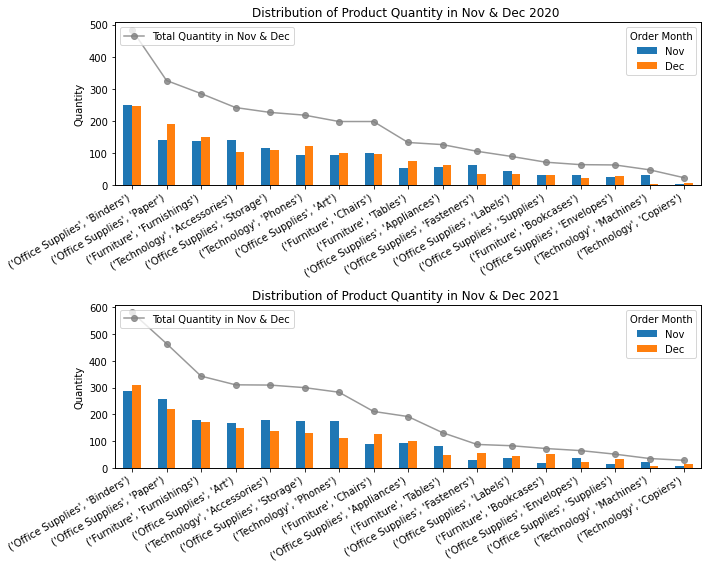

In [35]:
products_over_month = superstore.pivot_table(index = ['Order Year', 'Category', 'Sub-Category'],
                                             values = ['Quantity'],
                                             columns = ['Order Month'], aggfunc = 'sum')

fig, ax = plt.subplots(figsize = (10, 8), nrows = 2, ncols = 1)
i = 0
for year in [2020, 2021]:
    # prepare the data
    temp_df1 = products_over_month.loc[year, ('Quantity', [11, 12])]['Quantity']
    temp_df2 = temp_df1.sum(axis = 1).sort_values(ascending = False)
    temp_df1 = temp_df1.loc[temp_df2.index]
    
    # plot the data
    temp_twinx = ax[i].twinx()
    temp_df1.plot(kind = 'bar', ax = ax[i])
    temp_df2.plot(kind = 'line', ax = temp_twinx, 
                  label = 'Total Quantity in Nov & Dec', color = 'gray', alpha = 0.8, marker = 'o')
    
    # misc
    ax[i].set_xticklabels(temp_df1.index, rotation = 30, ha = 'right')
    ax[i].set_title('Distribution of Product Quantity in Nov & Dec {} '.format(year))
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Quantity')
    ax[i].set_ylim([0, temp_df2.max()+10])
    temp_twinx.get_yaxis().set_ticks([])
    temp_twinx.legend(loc = 'upper left')
    ax[i].legend(labels = ['Nov', 'Dec'], title = 'Order Month')
    
    i += 1
plt.tight_layout()
plt.show()

### Main question: What is the main driver of loss?

#### Profit vs Discount

From the previous analysis, it seems like the main driver of loss is due to high discount rate given to the customers. Let's check how discount given could affect the loss and profit in Superstore.

In [36]:
# create profit status and loss status columns
superstore['Profit Status'] = superstore['Profit'].apply(lambda x: 1 if x > 0 else 0)
superstore['Loss Status'] = superstore['Profit'].apply(lambda x: 1 if x <= 0 else 0)

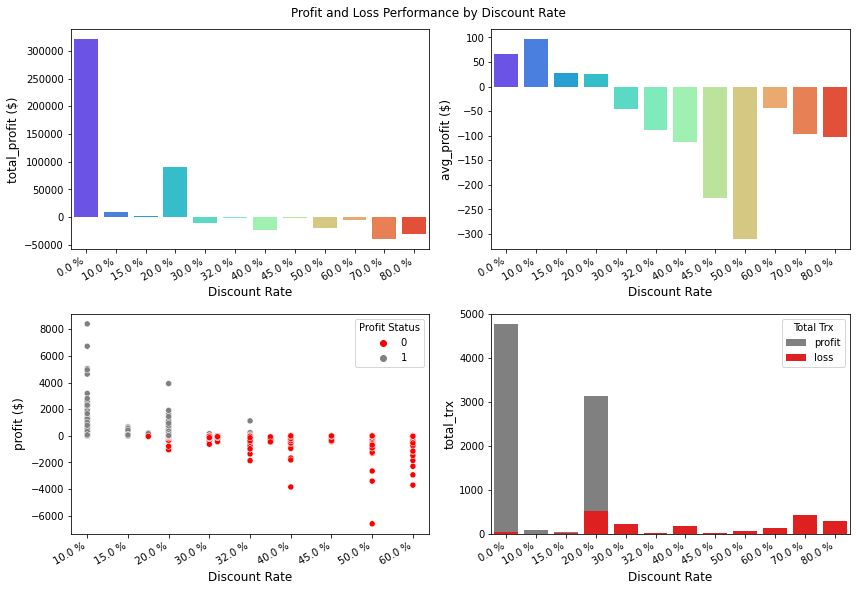

In [37]:
df = superstore.groupby('Discount').agg(total_profit = ('Profit', 'sum'),
                                        avg_profit = ('Profit', 'mean'),
                                        total_profit_trx = ('Profit Status', 'sum'),
                                        total_loss_trx = ('Loss Status', 'sum'))
df = df.reset_index()
df['Discount'] = df['Discount'].apply(lambda x: str(x*100) + ' %')

fig, ax = plt.subplots(figsize = (12, 8), ncols = 2, nrows = 2)

sns.barplot(data = df, x = 'Discount', y = 'total_profit', ax = ax[0][0], palette = 'rainbow')
sns.barplot(data = df, x = 'Discount', y = 'avg_profit', ax = ax[0][1], palette = 'rainbow')
sns.scatterplot(data = superstore, x = 'Discount', y = 'Profit', hue = 'Profit Status', ax = ax[1][0], palette = ['red', 'gray'])
sns.barplot(data = df, x = 'Discount', y = 'total_profit_trx', ax = ax[1][1], color = 'gray', label = 'profit')
sns.barplot(data = df, x = 'Discount', y = 'total_loss_trx', ax = ax[1][1], color = 'red', label = 'loss')

ax[0][0].set_ylabel('total_profit ($)', fontsize = 12); ax[0][1].set_ylabel('avg_profit ($)', fontsize = 12)
ax[1][0].set_ylabel('profit ($)', fontsize = 12); ax[1][1].set_ylabel('total_trx', fontsize = 12)

ax[0][0].set_xlabel('Discount Rate', fontsize = 12); ax[0][1].set_xlabel('Discount Rate', fontsize = 12)
ax[1][0].set_xlabel('Discount Rate', fontsize = 12); ax[1][1].set_xlabel('Discount Rate', fontsize = 12)

ax[0][0].set_xticklabels(df['Discount'], rotation = 30, ha = 'right'); ax[0][1].set_xticklabels(df['Discount'], rotation = 30, ha = 'right')
ax[1][0].set_xticklabels(df['Discount'], rotation = 30, ha = 'right'); ax[1][1].set_xticklabels(df['Discount'], rotation = 30, ha = 'right')

ax[1][1].legend(title = 'Total Trx')
plt.tight_layout()
plt.suptitle('Profit and Loss Performance by Discount Rate', x = 0.5, y = 1.02, fontsize = 12)
plt.show()

- It looks like `Discount` is the main driver of loss.
- High discount given for a transaction lead to high negative profit (high loss).
- The discount threshold should be about 20%.
- Normal place has high profit `total_profit`.

#### Profit and Loss profile

Let's see how is the distribution of the transactions at profit and loss state across `Region`, `Category`, and `Sub-Category` using pieplot and countplot to identify which region is the weakest and makes more loss.

Insights:
- `Region`: Proportion of loss status more occurs in "Central" and "East" region while profit in "West" and "East" region.
- `Category`: Proportion of loss status more occurs on "Furniture" category while profit on "Office Supplies".
- `Sub-Category`: Large loss proportion occurs on "Binder", "Chairs", "Tables", and "Bookcases" (total trx of loss more than 75% of total trx of profit). Interestingly, "Binders" has the highest proportion of loss and on the other hand it has the highest `avg_discount` too compared to other `Sub-Category`. This is the main driver of high loss porportion on "Binders".

In [38]:
# features to analyze
# features = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount', 
#             'Returned', 'Order Year', 'Order Month', 'Order Day', 'Order Weekend/Weekday', 'Punctuality']
features = ['Region', 'Category', 'Sub-Category']

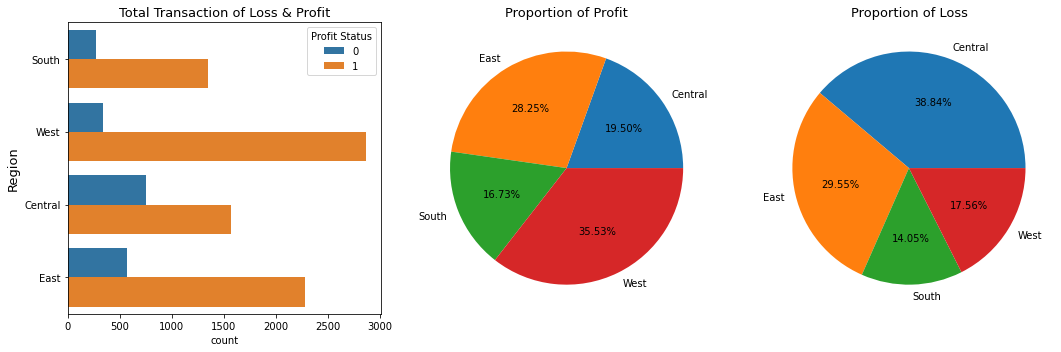

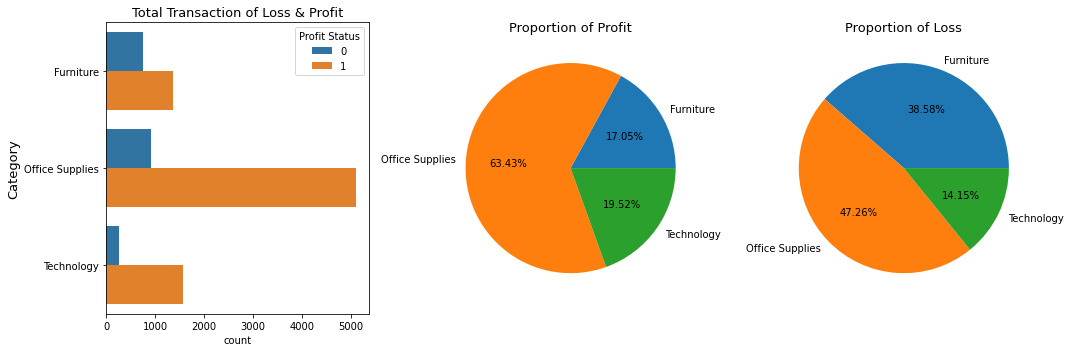

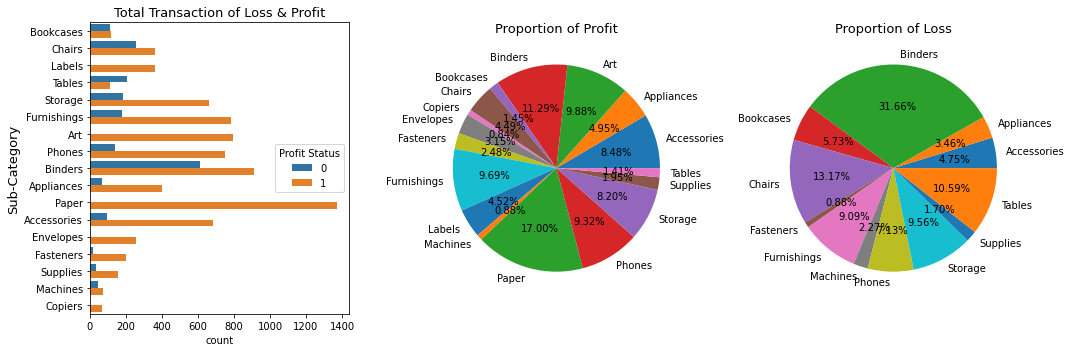

In [39]:
for col in superstore[features].columns:
    fig, ax = plt.subplots(figsize = (15, 5), ncols = 3, nrows = 1)
    
    # plot 1: countplot
    sns.countplot(data = superstore, y = superstore[col], hue = 'Profit Status', ax = ax[0])
    ax[0].set_title('Total Transaction of Loss & Profit', loc = 'center', fontsize = 13)
    ax[0].set_ylabel(str(col), fontsize = 13)
    
    # plot 2: proportion of profit
    _ = superstore[superstore['Profit Status'] == 1]
    _.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', ax = ax[1])
    ax[1].set(xlabel = None, ylabel = None)
    ax[1].set_title('Proportion of Profit', loc = 'center', fontsize = 13)
    
    # plot 3: proportion of loss
    _ = superstore[superstore['Profit Status'] == 0]
    _.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', ax = ax[2])
    ax[2].set(xlabel = None, ylabel = None)
    ax[2].set_title('Proportion of Loss', loc = 'center', fontsize = 13)
    
    plt.tight_layout()
    plt.show()

####  "Binder", "Chairs", "Tables", and "Bookcases" performances for each region

In [40]:
def percentage(x):
    return np.sum(x)/np.size(x)
df = superstore.groupby(['Region', 'Sub-Category']).agg(total_profit = ('Profit', 'sum'),
                                                        avg_discount = ('Discount', 'mean'),
                                                        percentage_of_loss = ('Loss Status', percentage),
                                                        percentage_of_profit = ('Profit Status', percentage))
df = df.reset_index()
analyze_sub_category = ['Binders', 'Chairs', 'Tables', 'Bookcases']
df = df[df['Sub-Category'].isin(analyze_sub_category)]
loss_profit_df = df.pivot_table(index = 'Sub-Category', columns = ['Region'], values = ['percentage_of_loss', 'percentage_of_profit'])

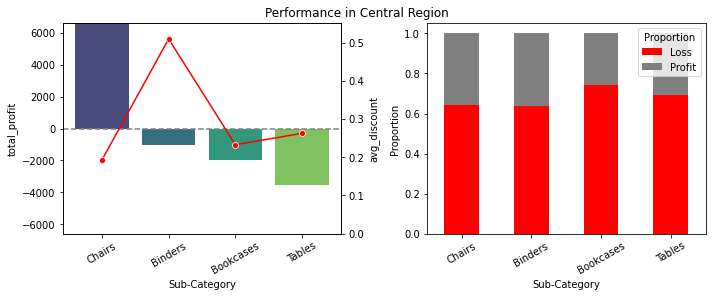

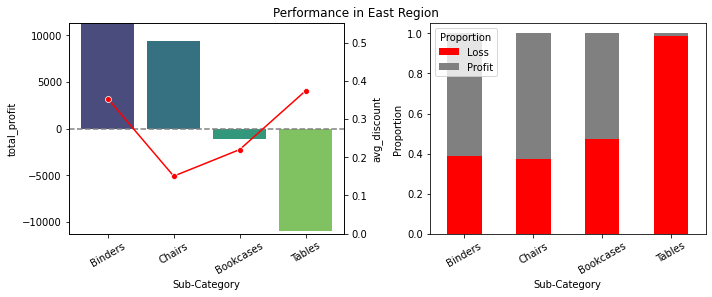

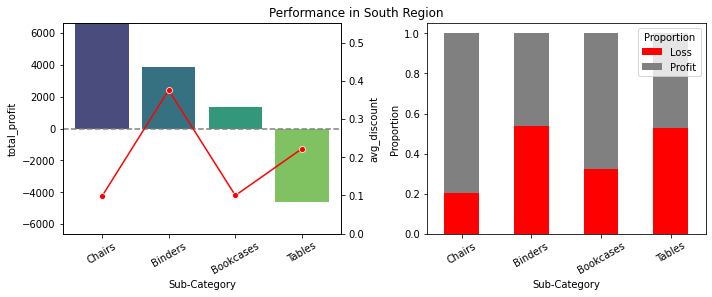

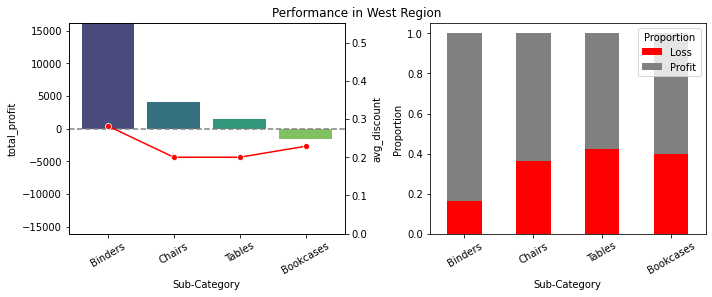

In [41]:
regions = ['Central', 'East', 'South', 'West']
for region in regions:
    fig, ax = plt.subplots(figsize = (10, 4), ncols = 2, nrows = 1)
    
    # left-side plot
    ax1 = ax[0].twinx()
    region_df = df[df['Region'] == region].sort_values('total_profit', ascending = False)
    sns.barplot(data = region_df, x = 'Sub-Category', y = 'total_profit', ax = ax[0], palette = 'viridis', order = region_df['Sub-Category'])              
    sns.lineplot(data = region_df, x = 'Sub-Category', y = 'avg_discount', ax = ax1, color = 'red', marker = 'o')     
    ax[0].axhline(y = 0, color = 'gray', linestyle = '--')
    ax[0].set_ylim([-1*region_df['total_profit'].max(), 1*region_df['total_profit'].max()])
    ax1.set_ylim([0.0, 0.55])
    ax[0].set_xticklabels(region_df['Sub-Category'], rotation = 30)
    
    # right-side plot
    percentage_df = pd.concat([loss_profit_df['percentage_of_loss'][[region]],
                               loss_profit_df['percentage_of_profit'][[region]]], axis = 1).loc[region_df['Sub-Category']]
    percentage_df.plot(kind = 'bar', stacked = True, ax = ax[1], color = ['red', 'gray'])
    ax[1].legend(['Loss', 'Profit'], title = 'Proportion')
    ax[1].set_xticklabels(region_df['Sub-Category'], rotation = 30)
    ax[1].set_ylabel('Proportion')
    
    plt.tight_layout()
    plt.suptitle('Performance in {} Region'.format(region), y = 1.02)
    plt.show()

Insights:
- There are more than 50% of loss on "Binders", "Chairs", "Tables", and "Bookcases" in "Central" region. This is the weakest region to sell "Binders" then followed by "South" region. The average discount given is too high (up to 50%).
- Almost 99% of loss occurs on selling "Tables" in "East" region and this is also due to the highest avg discount given compared to other region.
- "West" region is more profitable because the discount regulation is smaller.
- Mostly, high loss on transactions are due to very high discount given.

# Customer Segmentation

The most widely used model for customer segmentation is RFM segmentation model. What is RFM segmentation? RFM segmentation is behavioral customer segmentation model based on three metrics: `Recency` (R), `Frequency` (F), and `Monetary` (M).
- `Recency`: days since last customer transaction.
- `Frequency`: number of transactions in specific interval of 2 different timestamps.
- `Monetary`: total spend in the specific interval of 2 different timestamps.

A new metric, `Length`, is also added which defines how long a person has been becoming a customer in Superstore.

In sum, we modify the RFM model to be **LRFM model**.
- `Length`: length of time since the first transaction of customer to a specific $T_n$ timestamp. [unit: months]
- `Recency`: length of time (e.g. days) since last customer transaction to a specific $T_n$ timestamp. [unit: days]
- `Frequency`: number of total transactions in a specific interval of 2 different timestamps, $T_1$ to $T_n$.  [unit: total]
- `Monetary`: total money spend in a specific interval of 2 different timestamps, $T_1$ to $T_n$. [unit: USD]

3 clustering algorithms is used for LRFM model segmentation, that is K-Means, Gaussian Mixture Model, and Hierarchical Clustering and then these 3 algorithms will be compared.

## Prepare the data for segmentation

Transform the user per transaction-based data into user-based data.

In [42]:
# create the hypothetical date of today
snapshot_date = superstore['Order Date'].max() + dt.timedelta(days = 1)
print('The last transaction datetime in Superstore:', superstore['Order Date'].max())
print('The hypothetical datetime of today:', snapshot_date)

The last transaction datetime in Superstore: 2021-12-30 00:00:00
The hypothetical datetime of today: 2021-12-31 00:00:00


In [43]:
# create LRFMC table
customers = superstore.groupby(['Customer ID', 'Customer Name']).agg(Length = ('Order Date', lambda x: (snapshot_date.year - x.min().year)*12 + \
                                                                                                   (snapshot_date.month - x.min().month)), 
#                                                                  Length = ('Order Date', lambda x: (snapshot_date - x.min()).days),
                                                                 Recency = ('Order Date', lambda x: (snapshot_date - x.max()).days),
#                                                                  Recency =  ('Order Date', lambda x: (snapshot_date.year - x.max().year)*12 + \
#                                                                                                    (snapshot_date.month - x.max().month)),
                                                                 Frequency = ('Order ID', 'count'),
                                                                 Monetary = ('Sales', 'sum'))
customers

Length  Recency  Frequency  Monetary
Customer ID Customer Name                                           
AA-10315    Alex Avila              45      185         11  5563.560
AA-10375    Allen Armold            44       20         15  1056.390
AA-10480    Andrew Allen            43      260         12  1790.512
AA-10645    Anna Andreadi           42       56         18  5086.935
AB-10015    Aaron Bergman           46      416          6   886.156
...                                ...      ...        ...       ...
XP-21865    Xylona Preis            47       44         28  2374.658
YC-21895    Yoseph Carroll          37        5          8  5454.350
YS-21880    Yana Sorensen           35       10         12  6720.444
ZC-21910    Zuschuss Carroll        38       55         31  8025.707
ZD-21925    Zuschuss Donatelli      40      203          9  1493.944

[793 rows x 4 columns]

In [44]:
# helper function to check the distribution
def check_distribution(df):
    plt.figure(figsize = (20, 20))
    i = 1
    for col in df.columns:
        plt.subplot(5, 5, i)
        ax = sns.distplot(x = df[col], color ='#676FA3')
        plt.title('"{}" distribution'.format(col), loc = 'center', fontsize = 15)
        plt.xticks(rotation = 20, fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.tight_layout()
        i += 1
    plt.show()

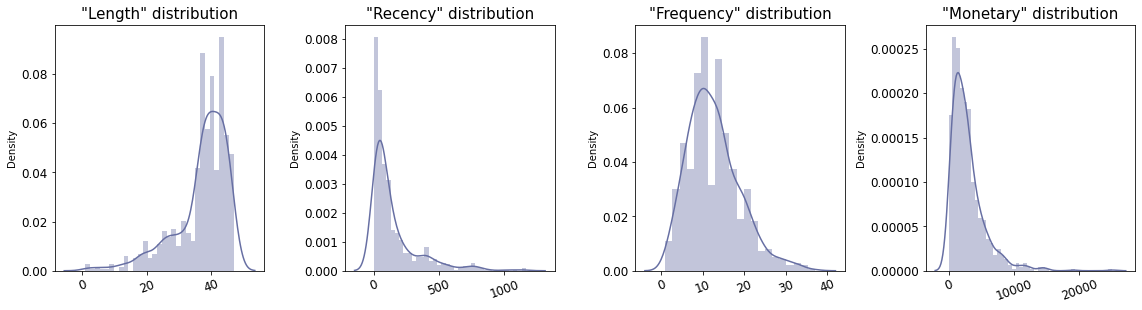

In [45]:
check_distribution(customers)

- The distributions are slightly skewed for `Frequency` while the others are very skewed.

## Segmentation using K-Means

K-Means algorithm is the most commonly and widely used for clustering algorithm. But this algorithm assumes and works well when the data points on N-dimensional features space are circularly (or spherically) clustered with similar density and size between each cluster [(soure)](https://www.r-bloggers.com/2017/08/exploring-assumptions-of-k-means-clustering-using-r/#:~:text=K%2DMeans%20clustering%20method%20considers,the%20data%20and%20forms%20clusters.). It is also fast and efficient in terms of computational cost.

### Data preprocessing

K-Means algorithm works well when the features of the data are at uniform variance (zero mean and one standard deviation). This is because K-Means algorithm works with distance-based algorithm. So we have to scale the data first. Scaling the data also helps the algorithm to converge faster.

These below are the helper functions to execute and analyze K-Means clustering easier, at least for me.

In [46]:
# transform the data into normal distribution
from sklearn.preprocessing import power_transform
def normal_transformation(df):
    temp_df = df.copy()
    
    temp_df = power_transform(temp_df, method = 'yeo-johnson', standardize = False)
    temp_df = pd.DataFrame(temp_df, index = df.index, columns = df.columns)
    return temp_df

# scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def scaling(df, scaler):
    temp_df = df.copy()
    
    scl = scaler
    temp_df = scl.fit_transform(temp_df)
    temp_df = pd.DataFrame(temp_df, index = df.index, columns = df.columns)
    return temp_df

In [47]:
# helper function for Elbow method and Silhouette method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

def find_optimal_K_kmeans(df, K):
    model = KMeans(random_state = 42)
    
    # plot the optimal number of clusters (Elbow and Silhouette)
    metrics = ['distortion', 'silhouette']
    K_opt = []
    for i in range(2):
        vis = KElbowVisualizer(model, k = K, metric = metrics[i], timings = False, locate_elbow = True)
        vis.fit(df)
        vis.show()
        K_opt.append(vis.elbow_value_)
        
    # plot Silhouette analysis
    X = df
    K_opt = np.sort(K_opt)
    for n_clusters in range(K_opt[0], K_opt[1] + 1, 1):
        fig, ax1 = plt.subplots(figsize = (6, 4))
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # KMeans
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        ax1.set_title("The silhouette plot of n_clusters = {} with silhouette_avg = {}".format(n_clusters, silhouette_avg))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [48]:
# helper function for modelling using K-Means

# modelling K-Means
def kmeans_clustering(k, df, label_name, plot_show):
    temp_df = df.copy()
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(temp_df)
    temp_df[label_name] = kmeans.labels_ + 1
    
    # plot the K-Means result
    _ = dimen_reduction(temp_df.iloc[:, :-1], 
                        PC = 3, plot_PC = plot_show, labels = kmeans.labels_ + 1)
    return temp_df[label_name], _

# reduce the dimensions to plot the K-Means results
from sklearn.decomposition import PCA
import plotly.express as px
def dimen_reduction(df, PC, plot_PC, labels):
    temp_df = df.copy()
    
    pca = PCA(n_components = PC)
    temp_df = pca.fit_transform(temp_df)
    temp_df = pd.DataFrame(temp_df, index = df.index, columns = ['PC{}'.format(i+1) for i in range(PC)])
    
    # show explained_variance_ratio_
    fig, ax = plt.subplots(figsize = (10, 4), nrows = 1, ncols = 2)
    print('Total Variance Explained:', sum(pca.explained_variance_ratio_))
    pd.DataFrame(pca.explained_variance_ratio_).plot(kind = 'bar', alpha = 0.6, ax = ax[0], legend = None)
    _ = 0
    total_explained_variance_ratio_ = []
    for i in pca.explained_variance_ratio_:
        _ += i
        total_explained_variance_ratio_.append(_)
    pd.DataFrame(total_explained_variance_ratio_).plot(kind = 'line', marker = 'o', ax = ax[0], legend = None)
    ax[0].set_xlabel('Principle Components')
    ax[0].set_ylabel('Percentage Variance Explained')
    ax[0].set_title('Scree Plot')
    
    # show reduced dimension plot
    if plot_PC == True:
        if PC >= 2:
            temp_df.plot(kind = 'scatter', x = 'PC1', y = 'PC2', c = labels, colormap = 'viridis', colorbar = False, ax = ax[1])
            ax[1].set_xlabel('PC1')
            ax[1].set_ylabel('PC2')
            ax[1].set_title('PC1 and PC2 Plot')
            plt.tight_layout()
            plt.show()
            
        if PC >= 3:
            import plotly.express as px
            fig = px.scatter_3d(temp_df, x = 'PC1', y = 'PC2', z = 'PC3', color = labels)
            fig.update_layout(title_text = 'PC1, PC2, and PC3 plot')
            fig.show('svg')
    return temp_df

In [49]:
# helper function for interpreting the clustering results

# radar plot
import plotly.graph_objects as go
def radar_plot(df, label_name, fill_in = None, name = '<blank>'):
    
    # prepare the data to be plotted
    df = df.groupby([label_name]).agg('mean').transform(lambda x: x/x.max()).T
    df = pd.concat([df, pd.DataFrame(df.loc[df.index[0],:]).T], axis = 0)
    
    # plot using radar plot
    fig = go.Figure()
    for cluster in df.columns:
        fig.add_trace(go.Scatterpolar(
            r = df[cluster],       
            theta = df.index,
            fill = fill_in,
            name = 'cluster {}'.format(cluster)))
    fig.update_layout(title_text = 'Radar Plot using {}'.format(name))  
    fig.show('svg')
    
# relative impotance and mean agg heatmap plot
import seaborn as sns
def heatmap_plot(df, label_name):
    fig, ax = plt.subplots(figsize = (10, 4), ncols = 2, nrows = 1)
    # relative important plot
    cluster_avg = df.groupby([label_name]).mean() 
    population_avg = df.iloc[:, :-1].mean()
    relative_imp = (cluster_avg / population_avg) - 1
    min_ = abs(relative_imp.min().min())
    max_ = relative_imp.max().max()
    sns.heatmap(data = relative_imp.T, annot = True, fmt = '.2f', 
                cmap = 'seismic', linewidths = 0.1, vmin = -max([min_, max_]), vmax = max([min_, max_]), ax = ax[0])
    ax[0].set_title('Relative importance of features')
    
    # aggregation with mean (normalized) plot
    agg_mean = df.groupby([label_name]).agg('mean').transform(lambda x: x/x.max()).T
    sns.heatmap(agg_mean, cmap = 'Reds', annot = True, 
                fmt = '.2f', linewidths = 0.1, ax = ax[1])
    ax[1].set_title('Mean Agg of features (normalized)')
    plt.tight_layout()
    plt.show()

### LRFM model

We will use the `Length`, `Recency`, `Frequency`, and `Monetary` to segment the customer behaviour.

In [50]:
# take the LRFM data
data = scaling(customers.iloc[:, :4], StandardScaler())
data.head()

Length   Recency  Frequency  Monetary
Customer ID Customer Name                                         
AA-10315    Alex Avila     0.935607  0.199889  -0.256912  1.015112
AA-10375    Allen Armold   0.816075 -0.686762   0.384256 -0.700590
AA-10480    Andrew Allen   0.696543  0.602912  -0.096620 -0.421139
AA-10645    Anna Andreadi  0.577010 -0.493311   0.865131  0.833680
AB-10015    Aaron Bergman  1.055139  1.441199  -1.058371 -0.765391

#### Find the optimal number of clusters

Before clustering with K-Means, We need to define the number of clusters to use. In order to find the optimal number of clusters, we will use Elbow method and Silhouette method. Specifying the number of clusters is one of the drawbacks of using K-Means clustering.

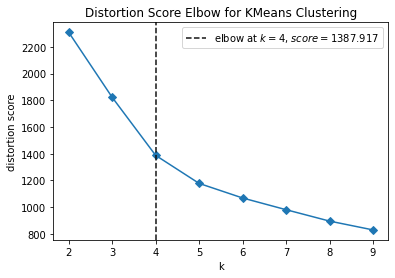

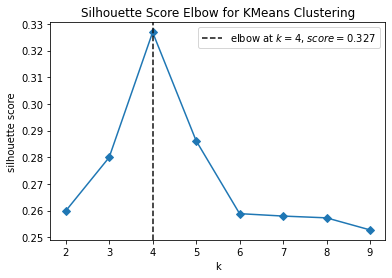

For n_clusters = 4 The average silhouette_score is : 0.32690038588371867


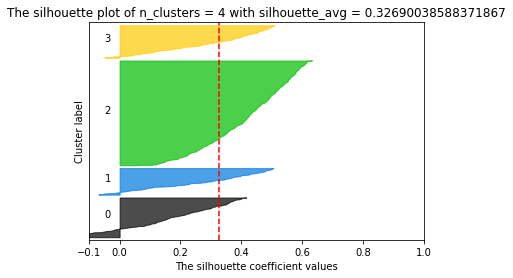

In [51]:
# find the optimal number of clusters
find_optimal_K_kmeans(df = data, 
                      K = (2, 10))

Insights:
- The optimal number of clusters are 4.

#### Modelling

We will perform K-Means clustering with K = 4.

======================================================= 4 clusters =======================================================
Total Variance Explained: 0.8960122097694594


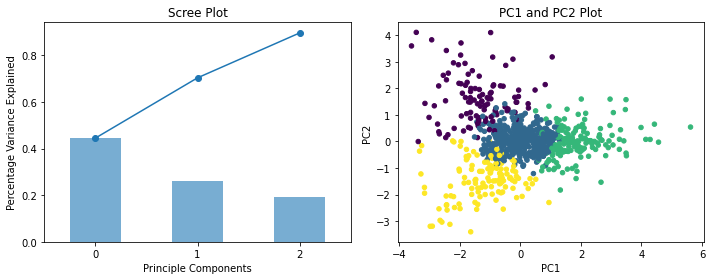

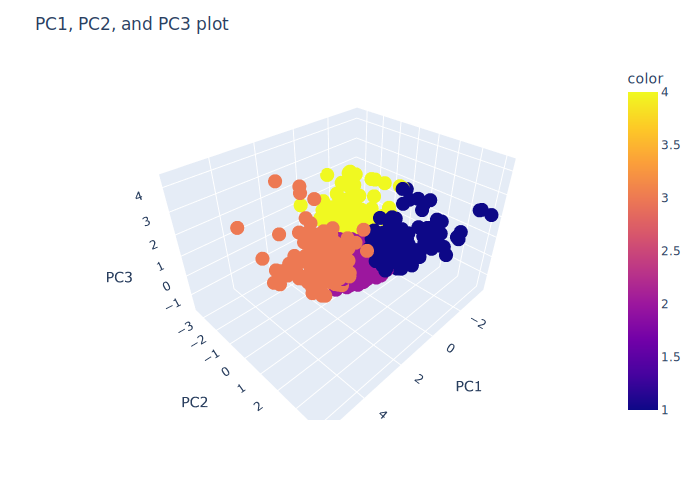

In [52]:
# get the clustering labels using K-Means clustering
labels = dict()
clusters = [4]       # define number of clusters to be analyzed -> 4 clusters
for cluster in clusters:
    print('='*55, '{} clusters'.format(cluster), '='*55)
    cluster_labels, _ = kmeans_clustering(k = cluster, 
                                          df = data, 
                                          label_name = 'Customer Labels',
                                          plot_show = True)
    labels['{} clusters'.format(cluster)] = cluster_labels.values

Insights:
- From the PCA plots, we get 89.6% explained variance ratio. So we lost the information in the dataset about 10% when plotting the data points in 3 dimension. This is not too bad to perform 3D plot with 3 Principal Components of PCA.
- We can see the LRFM model is not clustered far away from each other and not sperically clustered.

#### Interpretation of clusters

We will interpret our results by using `groupby()` method for each group of clusters to see how is the mean for each cluster and using relative importance of cluster features compared to population (the customers dataframe).

======================================================= 4 clusters ==================================================


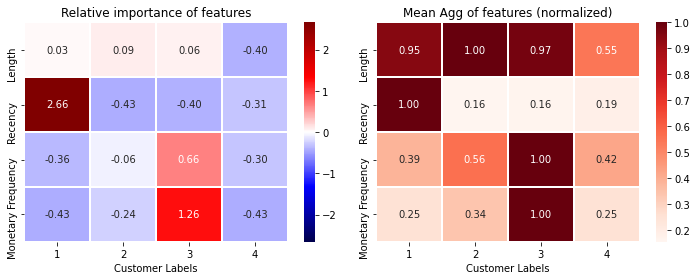

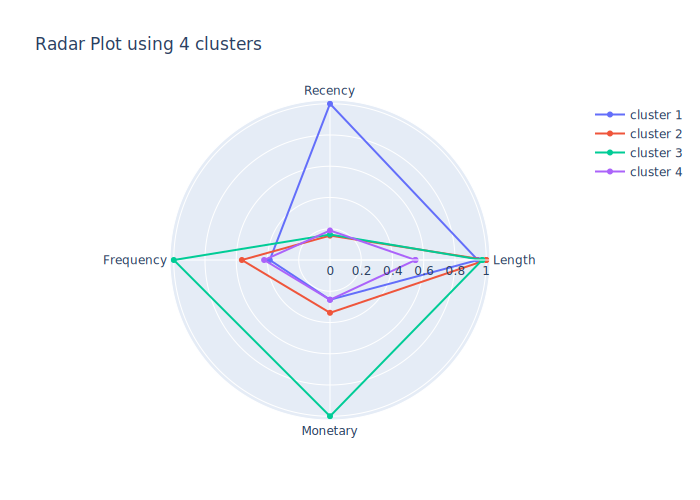

In [53]:
# Interpret the clusters
clustered_customers = customers[data.columns].copy()
for key, val in labels.items():
    print('='*55, '{}'.format(key), '='*50)
    clustered_customers['Customer Labels'] = val
    heatmap_plot(clustered_customers, label_name = 'Customer Labels')
    radar_plot(clustered_customers, label_name = 'Customer Labels', name = key)

Insights:
- We see that with 4 clusters, the characteristic (LRFM metric) of each cluster is different from each other.

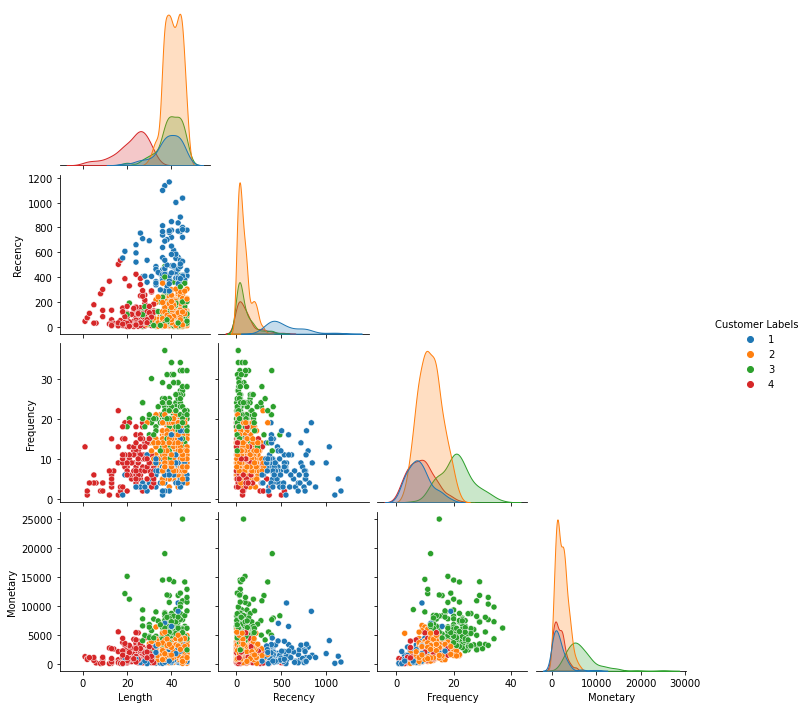

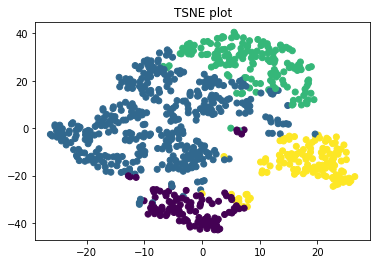

In [54]:
clustered_customers['Customer Labels'] = labels['4 clusters']
sns.pairplot(clustered_customers, hue = 'Customer Labels', palette = 'tab10', corner = True)
plt.show()

from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 'auto')
transformed = tsne.fit_transform(data.values)

plt.scatter(transformed[:,0], transformed[:,1],
             c = labels['4 clusters'])
plt.title('TSNE plot')
plt.show()

#### Assign the best K clusters and name each cluster

In [55]:
# assign K = 4 as the number of clusters
final_customers_kmeans = customers.iloc[:, :4].copy()
final_customers_kmeans['Customer Labels'] = labels['4 clusters']
final_customers_kmeans.head()

Length  Recency  Frequency  Monetary  \
Customer ID Customer Name                                         
AA-10315    Alex Avila         45      185         11  5563.560   
AA-10375    Allen Armold       44       20         15  1056.390   
AA-10480    Andrew Allen       43      260         12  1790.512   
AA-10645    Anna Andreadi      42       56         18  5086.935   
AB-10015    Aaron Bergman      46      416          6   886.156   

                           Customer Labels  
Customer ID Customer Name                   
AA-10315    Alex Avila                   2  
AA-10375    Allen Armold                 2  
AA-10480    Andrew Allen                 2  
AA-10645    Anna Andreadi                3  
AB-10015    Aaron Bergman                1

### Interpret LRFM Model (K-Means)

Insights:
- `final_customers_kmeans`:
    - `Cluster 1`: This can be interpreted as `"Lost"` customer segment. They are relatively old customers (L = 2) but their last purchased are very long ago (R = 1) with the lowest number of purchases (F = 1) and the lowest total spent (M = 1) compare to other clusters. It looks like this cluster contains a few high spender customers with low frequency of purchasing product (It may be expensive product).
    - `Cluster 2`: This can be interpreted as `"Important"` customer segment. They are  the oldest customers (L = 4) and they purchase very recently (R = 4) but not the most frequently (F = 3) and spent quite a lot (M = 3).
    - `Cluster 3`: This can be interpreted as `"Champion"` customer segment. They are old customers (L = 3) who have purchased quite recently (R = 3) and the most frequent buyer (F = 4) and spent the most (M = 4).
    - `Cluster 4`: This can be interpreted as `"Potential"` customer segment. They are new customers (L = 1) but their last purchased are quite a long (R = 2) with good amount of purchases (F = 2) and money spent (M = 2).

In [56]:
# final_customers_kmeans

# name each segment of customers
final_customers_kmeans['Customer Segment'] = final_customers_kmeans['Customer Labels']\
                                                    .apply(lambda x: 'Lost' if x == 1 else(
                                                                     'Important' if x == 2 else(
                                                                     'Champion' if x == 3 else(
                                                                     'Potential'))))
final_customers_kmeans.groupby('Customer Segment').agg({'Length':'mean',
                                                        'Recency':'mean',
                                                        'Frequency':'mean',
                                                        'Monetary':['mean', 'count']}).round(2)

Length Recency Frequency Monetary      
                   mean    mean      mean     mean count
Customer Segment                                        
Champion          39.57   88.11     20.90  6538.97   155
Important         40.62   84.44     11.79  2209.57   407
Lost              38.40  540.52      8.06  1661.99   104
Potential         22.20  102.11      8.81  1665.50   127

## Segmentation using Gaussian Mixture Models

Gaussian Mixture Models is more advanced algorithm for clustering. This model is a probabilistic model based on gaussian distribution function. If we have data points on N-dimensional features space then we would have a mixture of `K` Gaussian distributions (where `K` is equivalent to the number of clusters), each having a certain mean vector and covariance matrix.

Basically K-Means algorithm only updates the mean of the centroids in N-features space while Gaussian Mixture Models updates the mean and also updates the variance (covariance matrix) of the centroids. In other words, you can just see the GMM as a K-Means which is able to form stretched clusters.

### Data preprocessing

Similar to K-Means algorithm, we need to scale the features before applying GMM.

These are few helper function to conduct the clustering easier.

In [57]:
# helper function for modelling using GMM
from sklearn.mixture import GaussianMixture

# modelling GMM
def gmm_clustering(k, df_gmm, df_pca, label_name, plot_show, type_cov):
    temp_df = df_gmm.copy()
    
    GMM = GaussianMixture(n_components = k, random_state = 42, covariance_type = type_cov)
    GMM.fit(temp_df)
    temp_df[label_name] = GMM.predict(temp_df) + 1
    
    # plot the GMM result
    _ = dimen_reduction(df_pca, 
                        PC = 3, plot_PC = plot_show, labels = temp_df[label_name])
    return temp_df[label_name], _

In [58]:
# helper function finding the otimal K on GMM algorithm
def SelBest(arr:list, X:int)->list:
    dx = np.argsort(arr)[:X]
    return arr[dx]

def find_optimal_K_gmm(df, K):
    n_clusters = K
    
    # find BIC scores
    bics = []
    bics_err = []
    iterations = 20
    for n in n_clusters:
        tmp_bic = []
        for _ in range(iterations):
            gmm = GaussianMixture(n, n_init = 2).fit(df) 
            tmp_bic.append(gmm.bic(df)) 
        bics.append(np.mean(SelBest(np.array(tmp_bic), int(iterations/5))))
        bics_err.append(np.std(tmp_bic))
    
    # plot the bic score and gradient of bic
    fig, ax = plt.subplots(figsize = (12, 4), ncols = 2, nrows = 1)
    ax[0].errorbar(n_clusters, bics, yerr = bics_err)
    ax[0].set_title('BIC Scores')
    ax[0].set_xticks(n_clusters)
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('Score')
    
    ax[1].errorbar(n_clusters, np.gradient(bics), yerr = bics_err)
    ax[1].set_title('Gradient of BIC Scores')
    ax[1].set_xticks(n_clusters)
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('grad(BIC)')
    plt.show()

### LRFM Model

We will use the `Length`, `Recency`, `Frequency`, and `Monetary` to segment the customer behaviour.

In [59]:
# take the LRFM data
data = scaling(customers.iloc[:, :4], StandardScaler())
data.head()

Length   Recency  Frequency  Monetary
Customer ID Customer Name                                         
AA-10315    Alex Avila     0.935607  0.199889  -0.256912  1.015112
AA-10375    Allen Armold   0.816075 -0.686762   0.384256 -0.700590
AA-10480    Andrew Allen   0.696543  0.602912  -0.096620 -0.421139
AA-10645    Anna Andreadi  0.577010 -0.493311   0.865131  0.833680
AB-10015    Aaron Bergman  1.055139  1.441199  -1.058371 -0.765391

#### Find the optimal number of clusters

One of the method to find the optimal number of clusters on GMM algorithm is to find the lowest value of Bayesian Information Criterion/BIC [(source)](https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4).

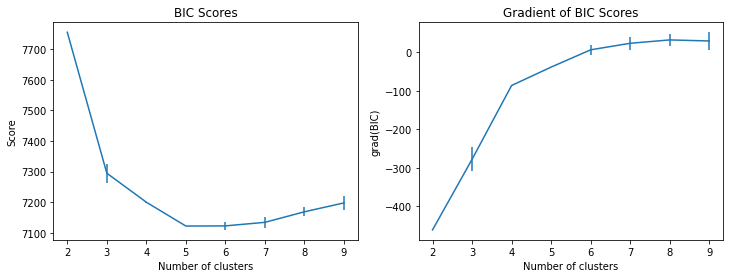

In [60]:
# find the optimal number of clusters
find_optimal_K_gmm(df = data, 
                   K = np.arange(2, 10))

Insights:
- The optimal number of clusters could be 5 clusters because the gradient of BIC doesn't improve so much after those cluster numbers which means no more information gain as we increase the number of clusters.

#### Modelling

======================================================= 5 clusters =======================================================
Total Variance Explained: 0.8960122097694597


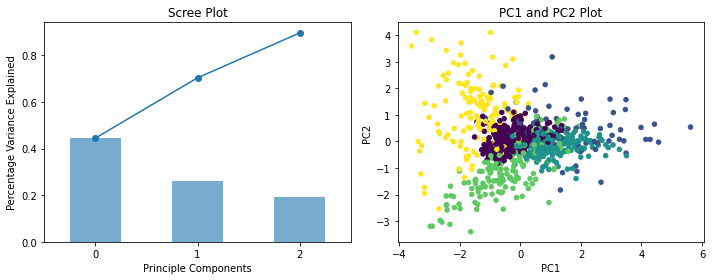

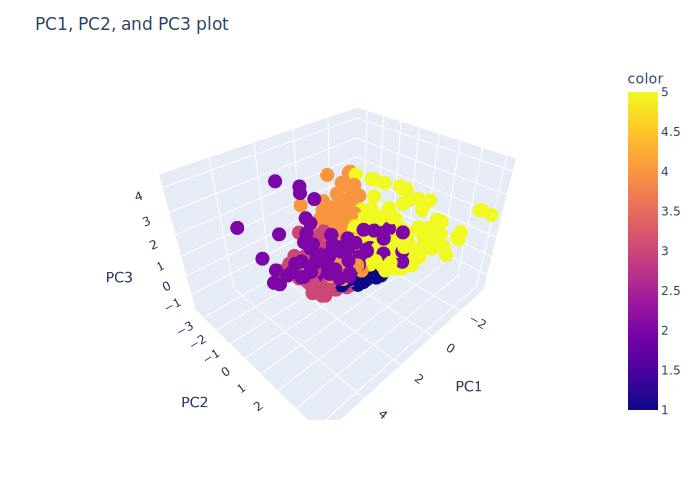

In [61]:
# get the clustering labels using GMM clustering
labels = dict()
clusters = [5]       # define number of clusters to be analyzed -> 5 clusters
for cluster in clusters:
    print('='*55, '{} clusters'.format(cluster), '='*55)
    cluster_labels, _ = gmm_clustering(k = cluster, 
                                       df_gmm = data,
                                       df_pca = scaling(data, StandardScaler()),
                                       label_name = 'Customer Labels',
                                       plot_show = True,
                                       type_cov = 'full')
    labels['{} clusters'.format(cluster)] = cluster_labels.values

#### Interpretation of clusters

We will interpret our results by using `groupby()` method for each group of clusters to see how is the mean for each cluster and using relative importance of cluster features compared to population (the customers dataframe).

======================================================= 5 clusters ==================================================


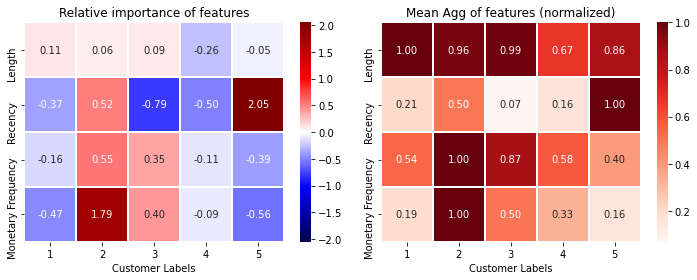

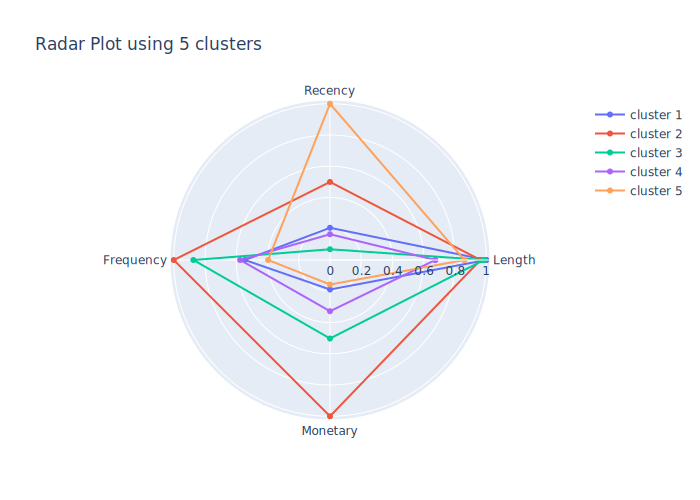

In [62]:
# Interpret the clusters
clustered_customers = customers[data.columns].copy()
for key, val in labels.items():
    print('='*55, '{}'.format(key), '='*50)
    clustered_customers['Customer Labels'] = val
    heatmap_plot(clustered_customers, label_name = 'Customer Labels')
    radar_plot(clustered_customers, label_name = 'Customer Labels', name = key)

Insights:
- We see that with 5 clusters, the characteristic (LRFM metric) of each cluster is different from each other.

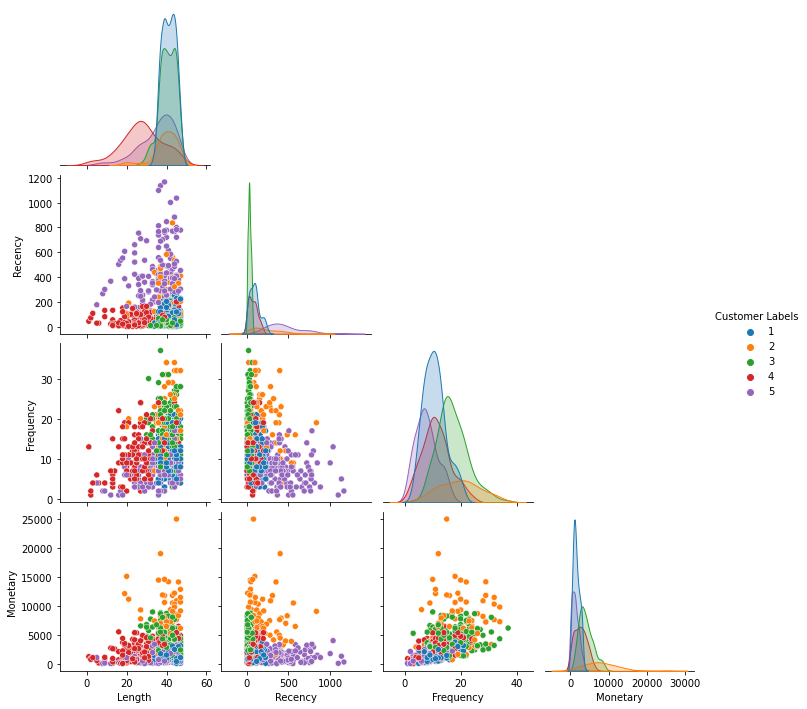

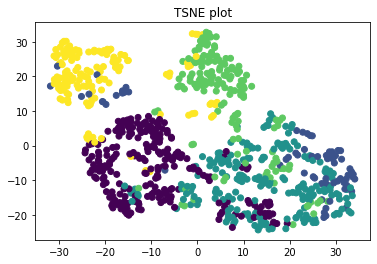

In [63]:
clustered_customers['Customer Labels'] = labels['5 clusters']
sns.pairplot(clustered_customers, hue = 'Customer Labels', palette = 'tab10', corner = True)
plt.show()

from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 'auto')
transformed = tsne.fit_transform(scaling(data, StandardScaler()))

plt.scatter(transformed[:,0], transformed[:,1],
             c = labels['5 clusters'])
plt.title('TSNE plot')
plt.show()

#### Assign the best K clusters and name each cluster

In [64]:
# assign K = 5 as the number of clusters
final_customers_gmm = customers.iloc[:, :4].copy()
final_customers_gmm['Customer Labels'] = labels['5 clusters']
final_customers_gmm.head()

Length  Recency  Frequency  Monetary  \
Customer ID Customer Name                                         
AA-10315    Alex Avila         45      185         11  5563.560   
AA-10375    Allen Armold       44       20         15  1056.390   
AA-10480    Andrew Allen       43      260         12  1790.512   
AA-10645    Anna Andreadi      42       56         18  5086.935   
AB-10015    Aaron Bergman      46      416          6   886.156   

                           Customer Labels  
Customer ID Customer Name                   
AA-10315    Alex Avila                   4  
AA-10375    Allen Armold                 3  
AA-10480    Andrew Allen                 5  
AA-10645    Anna Andreadi                3  
AB-10015    Aaron Bergman                5

### Interpret LRFM Model (GMM)

Insights:
- `final_customers_gmm`:
    - `Cluster 1`: This can be interpreted as `"Hibernating"` customer segment. This customer has good frequency but their last purchase is quite a long ago. Spent low amount of money and old customers.
    - `Cluster 2`: This can be interpreted as `"Most Valuable at Risk"` customer segment. This customer spent the most and the most frequent buyers but they haven't purchased in the past and they are old customers.
    - `Cluster 3`: This can be interpreted as `"Loyal"` customer segment. This customer spent a lot and purchased with very good frequency and the most recently buyers. They are old customers.
    - `Cluster 4`: This can be interpreted as `"Potential"` customer segment. This customer spent fairly good amount of money although they are a new customer, purchased in the recent past with good frequency.
    - `Cluster 5`: This can be interpreted as `"Lost Cheap"`customer segment. This customer has the lowest spending of money and frequency. Their last purchase is very long ago (lost this customer) and quite old customer.

In [65]:
# final_customers_gmm

# name each segment of customers
final_customers_gmm['Customer Segment'] = final_customers_gmm['Customer Labels']\
                                                    .apply(lambda x: 'Hibernating' if x == 1 else(
                                                                     'Most Valuable at Risk' if x == 2 else(
                                                                     'Loyal' if x == 3 else(
                                                                     'Potential' if x == 4 else(
                                                                     'Lost Cheap'
                                                                     )))))
final_customers_gmm.groupby('Customer Segment').agg({'Length':'mean',
                                                        'Recency':'mean',
                                                        'Frequency':'mean',
                                                        'Monetary':['mean', 'count']}).round(2)

Length Recency Frequency Monetary      
                        mean    mean      mean     mean count
Customer Segment                                             
Hibernating            41.09   92.83     10.62  1526.71   230
Lost Cheap             35.36  450.36      7.72  1268.01   140
Loyal                  40.49   30.96     17.04  4061.25   201
Most Valuable at Risk  39.57  224.99     19.49  8082.47    67
Potential              27.67   74.25     11.21  2649.68   155

## Segmentation using Hierarchical Clustering

Hierarchical clustering is clustering algorithm based on hierarchical group of clusters which can be either in divisional or agglomerative fashion. This algorithm is more flexible and easier to interpret because we don't have to specify the number of clusters at first, instead we just have to evaluate and see the linkage on dendrogram and define the minimal distance to perform a clusters.

The linkage on dendogram is made by computing the distance matrix between clusters at each stage where we have M stage if we have M data points and at each stage we will compare the distance between a specific cluster to all the remaining clusters then assess the linkage between them based on defined linkage method.

The computational cost for this algorithm is very expensive especially when we deal with very large dataset.

### Data preprocessing

Similar to K-Means algorithm, we need to scale the features before applying Hierarchical Clustering.

These are few helper function to conduct the clustering easier.

In [66]:
# helper function for modelling using Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# modelling Hierarchical Clustering
def hierarchical_clustering(distance_matrix, k, criterion, df_pca, label_name, plot_show):
    temp_df = pd.DataFrame(fcluster(Z = distance_matrix, t = k, criterion = criterion))
    temp_df.columns = [label_name]
    
    # plot the Hierarchical Clustering result
    _ = dimen_reduction(df_pca, 
                        PC = 3, plot_PC = plot_show, labels = temp_df[label_name])
    return temp_df[label_name], _

def compute_distance_matrix(df, linkage_method):
    distance_matrix = linkage(df, method = linkage_method, metric = 'euclidean')
    fig, ax = plt.subplots(figsize = (14, 6))
    dendrogram(distance_matrix,
               labels = df.droplevel(0).index,
               leaf_rotation = 45,
               leaf_font_size = 1)
    plt.title('Dendrogram using "{}" method'.format(linkage_method))
    plt.show()
    return distance_matrix

### LRFM model

We will use the `Length`, `Recency`, `Frequency`, and `Monetary` to segment the customer behaviour.

In [67]:
# take the LRFM data
data = scaling(customers.iloc[:, :4], StandardScaler())
data.head()

Length   Recency  Frequency  Monetary
Customer ID Customer Name                                         
AA-10315    Alex Avila     0.935607  0.199889  -0.256912  1.015112
AA-10375    Allen Armold   0.816075 -0.686762   0.384256 -0.700590
AA-10480    Andrew Allen   0.696543  0.602912  -0.096620 -0.421139
AA-10645    Anna Andreadi  0.577010 -0.493311   0.865131  0.833680
AB-10015    Aaron Bergman  1.055139  1.441199  -1.058371 -0.765391

#### Compute the distance matrix and show the linkage on dendogram

There are some methods to define the linkage between clusters. We will try several methods such as  `'ward'`, `'weighted'`, `'average'`, `'median'`, `'complete'`,  and `'single'` and then implement the most reasonable linkage method based on the dendrogram.

*Note: This algorithm is slower because the computational cost is quite expensive*

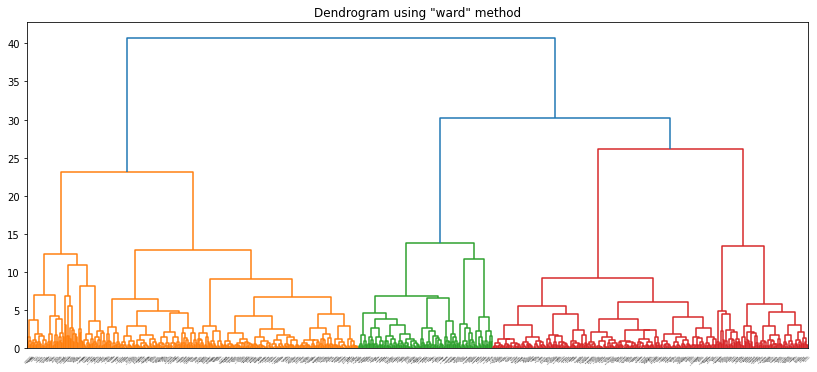

In [68]:
# compute the distance matrix and show the linkage on dendogram
methods = ['ward'] #['ward', 'weighted', 'average', 'median', 'complete', 'single']
distance_matrix = dict()
for method in methods:
    temp = compute_distance_matrix(data, linkage_method = method)
    distance_matrix[method] = temp

Insights:
- The most reasonable linkage method is `ward`. This method is preferable for dense data points as we saw in PCA plots.
- The best number of clusters are 4 clusters.

#### Modelling

======================================================= 4 clusters =======================================================
Total Variance Explained: 0.8960122097694583


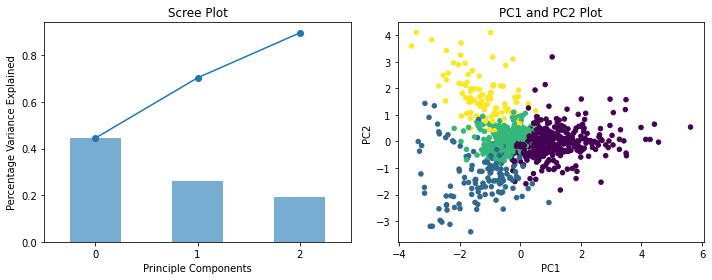

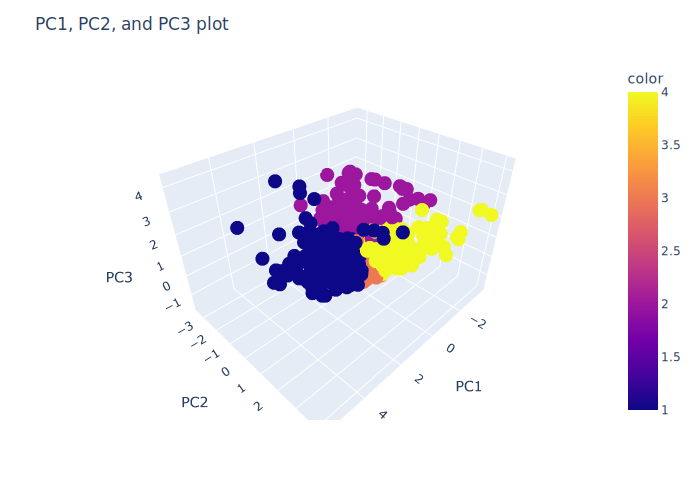

In [69]:
# get the clustering labels using Hierarchical clustering
labels = dict()
clusters = [4]       # define number of clusters to be analyzed -> 3 clusters
for cluster in clusters:
    print('='*55, '{} clusters'.format(cluster), '='*55)
    cluster_labels, _ = hierarchical_clustering(distance_matrix = distance_matrix['ward'], 
                                                k = cluster, 
                                                criterion = 'maxclust', 
                                                df_pca = scaling(data, StandardScaler()), 
                                                label_name = 'Customer Labels',
                                                plot_show = True)
    labels['{} clusters'.format(cluster)] = cluster_labels.values

#### Interpretation of clusters

We will interpret our results by using `groupby()` method for each group of clusters to see how is the mean for each cluster and using relative importance of cluster features compared to population (the customers dataframe).

======================================================= 4 clusters ==================================================


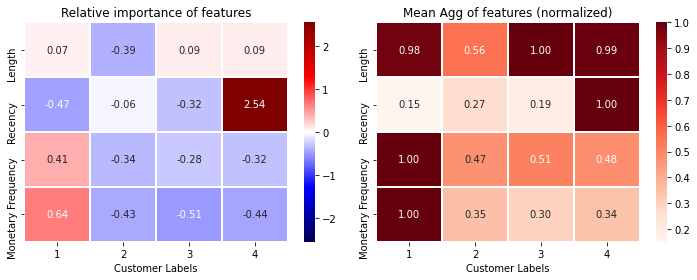

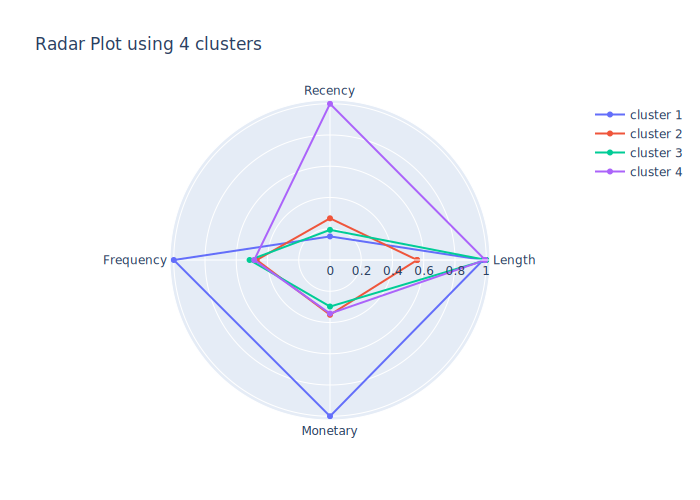

In [70]:
# Interpret the clusters
clustered_customers = customers[data.columns].copy()
for key, val in labels.items():
    print('='*55, '{}'.format(key), '='*50)
    clustered_customers['Customer Labels'] = val
    heatmap_plot(clustered_customers, label_name = 'Customer Labels')
    radar_plot(clustered_customers, label_name = 'Customer Labels', name = key)

Insights:
- We see that with 4 clusters, the characteristic (LRFM metric) of each cluster is different from each other.

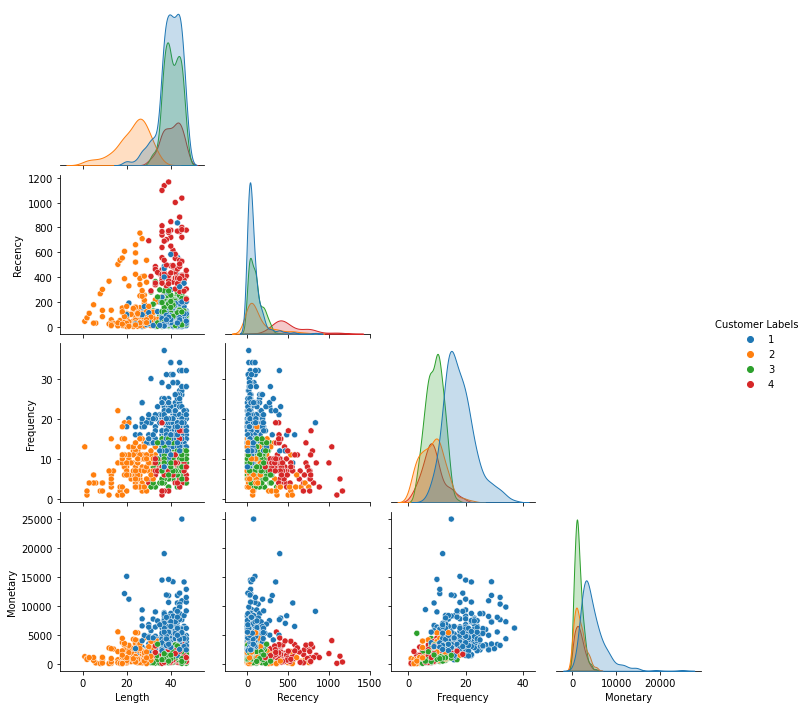

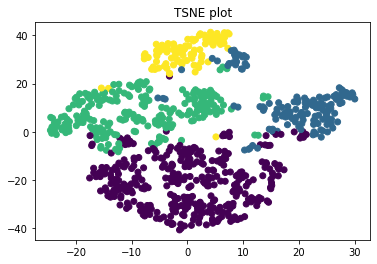

In [71]:
clustered_customers['Customer Labels'] = labels['4 clusters']
sns.pairplot(clustered_customers, hue = 'Customer Labels', palette = 'tab10', corner = True)
plt.show()

from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 'auto')
transformed = tsne.fit_transform(scaling(data, StandardScaler()))

plt.scatter(transformed[:,0], transformed[:,1],
             c = labels['4 clusters'])
plt.title('TSNE plot')
plt.show()

#### Assign the best K clusters and name each cluster

In [72]:
# assign K = 4 as the number of clusters
final_customers_hierarchical = customers.iloc[:, :4].copy()
final_customers_hierarchical['Customer Labels'] = labels['4 clusters']
final_customers_hierarchical.head()

Length  Recency  Frequency  Monetary  \
Customer ID Customer Name                                         
AA-10315    Alex Avila         45      185         11  5563.560   
AA-10375    Allen Armold       44       20         15  1056.390   
AA-10480    Andrew Allen       43      260         12  1790.512   
AA-10645    Anna Andreadi      42       56         18  5086.935   
AB-10015    Aaron Bergman      46      416          6   886.156   

                           Customer Labels  
Customer ID Customer Name                   
AA-10315    Alex Avila                   1  
AA-10375    Allen Armold                 1  
AA-10480    Andrew Allen                 3  
AA-10645    Anna Andreadi                1  
AB-10015    Aaron Bergman                4

### Interpret LRFM Model (Hierarchical Clustering)

Insights:
- `final_customers_hierarchical`:
    - `Cluster 1`: This can be interpreted as `"Champion"` customer segment.
    - `Cluster 2`: This can be interpreted as `"Potential"` customer segment.
    - `Cluster 3`: This can be interpreted as `"Important"` customer segment.
    - `Cluster 4`: This can be interpreted as `"Lost"` customer segment.

In [73]:
# final_customers_hierarchical

# name each segment of customers
final_customers_hierarchical['Customer Segment'] = final_customers_hierarchical['Customer Labels']\
                                                    .apply(lambda x: 'Champion' if x == 1 else(
                                                                     'Potential' if x == 2 else(
                                                                     'Important' if x == 3 else(
                                                                     'Lost'))))
final_customers_hierarchical.groupby('Customer Segment').agg({'Length':'mean',
                                                        'Recency':'mean',
                                                        'Frequency':'mean',
                                                        'Monetary':['mean', 'count']}).round(2)

Length Recency Frequency Monetary      
                   mean    mean      mean     mean count
Customer Segment                                        
Champion          39.82   79.01     17.76  4744.31   337
Important         40.63  100.97      9.14  1413.56   227
Lost              40.35  523.32      8.61  1625.74    93
Potential         22.65  139.63      8.34  1663.96   136

## Compare K-Means, GMM, and Hierarchical Clustering

Calculate the Davies Bouldin Scores and Silhouette Scores for each final model.

In [74]:
data = scaling(customers, StandardScaler())

In [75]:
from sklearn import metrics
label_models = [final_customers_kmeans['Customer Labels'].values,
                final_customers_gmm['Customer Labels'].values,
                final_customers_hierarchical['Customer Labels'].values]
DBI = []
silhouette = []
n_clusters = []
for label in label_models:
    DBI.append(metrics.davies_bouldin_score(data.values, label))
    silhouette.append(metrics.silhouette_score(data.values, label))
    n_clusters.append(len(np.unique(label)))
evaluation_performance = pd.DataFrame({'davies_bouldin_score':DBI, 
                                       'silhouette_score': silhouette,
                                       'n_clusters':n_clusters})
evaluation_performance.index = ['K-Means', 'GMM', 'Hierarchical']
evaluation_performance

davies_bouldin_score  silhouette_score  n_clusters
K-Means                   1.038882          0.326900           4
GMM                       1.474689          0.147293           5
Hierarchical              1.056796          0.235787           4

Insights:
- The higher the `silhouette_score` and the lower `davies_bouldin_score` then the better the model is.
- We will implement K-Means algorithm since this model has the best evaluation metric scores.

# Market Basket Analysis

Market Basket Analysis is a powerful tool for translating vast amounts of customer transaction and viewing data into simple rules for product promotion and recommendation. These rules are called association and dissociation rules. Association rules contain `"antecedent"` and `"consequent"` e.g. *if {friend chicken} then {ketchup}*, here "friend chicken" is the `"antecedent"` and ketchup is `"consequent"`. From these rules we can identify products frequently purchased together or not. In sum, Association rules tell us that two or more items are related or not.
- {antecedent} &rarr; {consequent} is translated as if {antecedent} then {consequent}
- {X} &rarr; {Y} is translated as if {X} then {Y} 

The main problem in Market Basket Analysis is taking an enormous set of potential association rules and selecting only those which are fruitful for a specific business application (The amount of rules increases exponentially with the number of items). But how do we know which association rules is fruitful? We can use some metrics to assess and quantify the score of association rules. Here are some of commonly used metrics:
- `Support`: an indication of how frequently the item X or (X & Y) appears in the data set.
$$Support(X) = \frac{Frequency(X)}{N}, range: [0,1]$$
$$Support(X \rightarrow Y) = \frac{Frequency(X \& Y)}{N}, range: [0,1]$$
- `Confidence`: tells us the probability that we'll purchase Y, given that we have purchased X.
$$Confidence(X \rightarrow Y) = \frac{Support(X \rightarrow Y)}{Support(X)}, range: [0,1]$$
- `Lift`: tells us that two items (X & Y) occur in transactions together more often than we would expect based on their individual support values. (This means that the relationship is unlikely to be explained by random chance)
    - If `Lift` > 1 then the association rules did not arise by random chance.
$$Lift(X \rightarrow Y) = \frac{Support(X \rightarrow Y)}{Support(X)Support(Y)}, range: [0,\infty]$$
- `Leverage`: Similar to `Lift` but easier to interpret.
    - If `Leverage` > 0 then the association rules did not arise by random chance.
$$Leverage(X \rightarrow Y) = Support(X \& Y) - Support(X)Support(Y), range: [-1,1]$$
- `Zhang` Introduced by Zhang (2000): measures both association and dissociation.
    - Value of +1 indicates perfect association.
    - Value of -1 indicates perfect dissociation.
$$Zhang(X \rightarrow Y) = $$
$$\frac{Support(X \& Y) - Support(X)Support(Y)}{Max[Support(X \& Y)(1 - Support(X)), Support(X)(Support(B) - Support(X \& Y))]}, range: [-1,1]$$


One of the most popular algorithm to use in Market Basket Analysis is Apriori Algorithm. This algorithm is fully explained in this article [(source)](https://pub.towardsai.net/association-discovery-the-apriori-algorithm-28c1e71e0f04). In sum, this algorithm could prune not important rules and select the only important rules by filtering the association rules metrics.

## Prepare the transactions data

Prepare the superstore dataset so that form a list of lists of transactions and then use `TransactionEncoder` to encode list of lists into one hot encoded transactions. This data format is needed if we want to apply association rules mining using `mlextend` library.

In [76]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

def zhangs_rule(rules):
    PAB = rules['support'].copy()
    PA = rules['antecedent support'].copy()
    PB = rules['consequent support'].copy()
    NUMERATOR = PAB - PA*PB
    DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
    return NUMERATOR / DENOMINATOR 

In [77]:
# create list of lits transcations based on Sub-Category
sub_category = superstore.groupby(['Order Date', 'Order ID']).agg(transactions = ('Sub-Category', 'unique'))['transactions']
sub_category = [list(trans) for trans in sub_category]

encoder = TransactionEncoder()
onehot = encoder.fit(sub_category).transform(sub_category)
df_sub_category = pd.DataFrame(onehot, columns = encoder.columns_)
df_sub_category

Accessories  Appliances    Art  Binders  Bookcases  Chairs  Copiers  \
0           False       False  False    False      False   False    False   
1           False       False  False     True      False   False    False   
2           False       False   True    False      False   False    False   
3           False       False   True    False      False   False    False   
4           False       False  False    False      False   False    False   
...           ...         ...    ...      ...        ...     ...      ...   
5004        False       False   True     True      False    True    False   
5005        False       False  False     True      False   False    False   
5006        False        True  False    False      False   False    False   
5007        False       False  False     True       True   False    False   
5008        False       False  False    False      False   False    False   

      Envelopes  Fasteners  Furnishings  Labels  Machines  Paper  Phones  \
0         False      False        False   False     False   True   False   
1         False      False        False    True     False  False   False   
2         False      False        False   False     False  False   False   
3         False      False        False   False     False  False   False   
4         False      False        False   False     False   True   False   
...         ...        ...          ...     ...       ...    ...     ...   
5004      False      False        False   False     False  False   False   
5005      False      False        False   False     False  False   False   
5006      False      False        False   False     False  False   False   
5007      False      False        False   False     False  False    True   
5008      False       True        False   False     False  False   False   

      Storage  Supplies  Tables  
0       False     False   False  
1        True     False   False  
2       False     False   False  
3       False     False   False  
4       False     False   False  
...       ...       ...     ...  
5004    False     False   False  
5005    False     False   False  
5006    False     False   False  
5007    False     False   False  
5008    False     False   False  

[5009 rows x 17 columns]

## Analyze the Sub-Category

Let's set the study case first!
- Let's say that we want transactions of sub-category that appears minimal `2` times in a month.
- Hence, we want the transactions to appear `2 * 12 = 24` times in a year.
- We have 4 year of transactions, So the `min_support` we should consider that is `24 * 4 (years) / 5009 (total trx) = 0.019 ~ 0.02`

In [78]:
# set the minimal transactions appeared in a month
transactions_per_month = 2
min_support = transactions_per_month * 12 * 4 / 5009
print('min_support:', min_support)

# prune the items that less than the 'min_support' threshold
frequent_itemsets = apriori(df_sub_category, min_support = min_support, use_colnames = True, max_len = 2)                           

# compute association rules metrics
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0) # no pruning
rules['zhang'] = zhangs_rule(rules)
rules

min_support: 0.01916550209622679


antecedents    consequents  antecedent support  consequent support  \
0   (Accessories)      (Binders)            0.143342            0.262727   
1       (Binders)  (Accessories)            0.262727            0.143342   
2   (Accessories)  (Furnishings)            0.143342            0.175085   
3   (Furnishings)  (Accessories)            0.175085            0.143342   
4   (Accessories)        (Paper)            0.143342            0.237772   
5         (Paper)  (Accessories)            0.237772            0.143342   
6   (Accessories)       (Phones)            0.143342            0.162507   
7        (Phones)  (Accessories)            0.162507            0.143342   
8   (Accessories)      (Storage)            0.143342            0.155121   
9       (Storage)  (Accessories)            0.155121            0.143342   
10   (Appliances)      (Binders)            0.090038            0.262727   
11      (Binders)   (Appliances)            0.262727            0.090038   
12        (Paper)   (Appliances)            0.237772            0.090038   
13   (Appliances)        (Paper)            0.090038            0.237772   
14          (Art)      (Binders)            0.145937            0.262727   
15      (Binders)          (Art)            0.262727            0.145937   
16          (Art)  (Furnishings)            0.145937            0.175085   
17  (Furnishings)          (Art)            0.175085            0.145937   
18        (Paper)          (Art)            0.237772            0.145937   
19          (Art)        (Paper)            0.145937            0.237772   
20       (Phones)          (Art)            0.162507            0.145937   
21          (Art)       (Phones)            0.145937            0.162507   
22      (Storage)          (Art)            0.155121            0.145937   
23          (Art)      (Storage)            0.145937            0.155121   
24       (Chairs)      (Binders)            0.114993            0.262727   
25      (Binders)       (Chairs)            0.262727            0.114993   
26      (Binders)  (Furnishings)            0.262727            0.175085   
27  (Furnishings)      (Binders)            0.175085            0.262727   
28        (Paper)      (Binders)            0.237772            0.262727   
29      (Binders)        (Paper)            0.262727            0.237772   
30       (Phones)      (Binders)            0.162507            0.262727   
31      (Binders)       (Phones)            0.262727            0.162507   
32      (Storage)      (Binders)            0.155121            0.262727   
33      (Binders)      (Storage)            0.262727            0.155121   
34       (Chairs)  (Furnishings)            0.114993            0.175085   
35  (Furnishings)       (Chairs)            0.175085            0.114993   
36        (Paper)       (Chairs)            0.237772            0.114993   
37       (Chairs)        (Paper)            0.114993            0.237772   
38        (Paper)  (Furnishings)            0.237772            0.175085   
39  (Furnishings)        (Paper)            0.175085            0.237772   
40       (Phones)  (Furnishings)            0.162507            0.175085   
41  (Furnishings)       (Phones)            0.175085            0.162507   
42      (Storage)  (Furnishings)            0.155121            0.175085   
43  (Furnishings)      (Storage)            0.175085            0.155121   
44        (Paper)       (Phones)            0.237772            0.162507   
45       (Phones)        (Paper)            0.162507            0.237772   
46        (Paper)      (Storage)            0.237772            0.155121   
47      (Storage)        (Paper)            0.155121            0.237772   
48       (Phones)      (Storage)            0.162507            0.155121   
49      (Storage)       (Phones)            0.155121            0.162507   

     support  confidence      lift  leverage  conviction     zhang  
0   0.032142    0.224234  0.853486 -0.005518    0.950381 -0.

### Case 1: Promote high price products with discount together with the most frequent purchased cheap products

We see that the most frequent `Sub-Category` transactions in Superstore are from `Binders` and `Paper`. Since those products are probably considered as cheap products, we can prepare discount schemes on the expensive consequent items on purchasing of antecedent items (`Binders` and `Paper`) in order to increase the sales on consequent items.

In [79]:
# get 'Binders' as antecedents
antecedents_binders = rules[rules['antecedents'] == {'Binders'}]
antecedents_binders['antecedents'] = antecedents_binders['antecedents'].apply(lambda a: ','.join(list(a)))
antecedents_binders['consequents'] = antecedents_binders['consequents'].apply(lambda a: ','.join(list(a)))

# sort by 'lift' and show top 3
cm = sns.light_palette("green", as_cmap = True)
antecedents_binders.sort_values(by = 'lift', ascending = False).head(3).style.background_gradient(cmap = cm)

In [80]:
# get 'Paper' as antecedents 
antecedents_paper = rules[rules['antecedents'] == {'Paper'}]
antecedents_paper['antecedents'] = antecedents_paper['antecedents'].apply(lambda a: ','.join(list(a)))
antecedents_paper['consequents'] = antecedents_paper['consequents'].apply(lambda a: ','.join(list(a)))

# sort by 'lift' and show top 3
cm = sns.light_palette("green", as_cmap = True)
antecedents_paper.sort_values(by = 'lift', ascending = False).head(3).style.background_gradient(cmap = cm)

Insights:
- We find that {Binders} &rarr; {Appliances} and {Paper} &rarr; {Appliances} are useful assocation rules (*the highest lift, leverage, conviction, and zhang metrics*). If someone purchases `Binders` or `Paper`, they are likely to purchase it together with `Appliances`.
- From this we can use `Binders` or `Paper` as the antecedents to promote `Appliances`. So every time someone purchases `Binders` or `Paper` (which is most frequent to happen), we can promote `Appliances` and give reasonable discount to the product.
- Interestingly, we know that `Binders` and `Paper` are the most frequent transactions that appears in Superstore, but they have dissociation (*negative zhang value*). Hence `Paper` and `Binders` are not good for cross-selling.

### Case 2: Increase the sales on profitable products by putting them together with their complementary products

Suppose we want to increase the sales on `Phones` since it gives relatively high total profit and high amount of transactions (see the EDA section). What are the products that are frequently purchased together with `Phones` so that we can put those products close to each other and increase the odds of being purchased together?

In [81]:
# get 'Phones' as consequents
consequents_phones = rules[rules['consequents'] == {'Phones'}]
consequents_phones['antecedents'] = consequents_phones['antecedents'].apply(lambda a: ','.join(list(a)))
consequents_phones['consequents'] = consequents_phones['consequents'].apply(lambda a: ','.join(list(a)))

# sort by 'lift'
cm = sns.light_palette("green", as_cmap = True)
consequents_phones.sort_values(by = 'lift', ascending = False).style.background_gradient(cmap = cm)

Insights:
- We find that `Phones` are frequently purchased together with `Art` or `Furnishings` as the antecedents. This is not due to random chance (*lift > 1, also zhang's and leverage's values are positive*). This may indicate that `Phones` is the complementary product for `Art` and `Furnishings`.
- We could increase the sales on `Phones` by putting `Phones` products at a place that closer to `Art` or `Furnishings` products. This will increase the probability of purchasing `Phones` when the customers purchase `Art` or `Furnishings`.

### Case 3: Bundle most frequent purchased products

Let's change the minimal transcations of `Sub-Category` that appears in a month, that is only 1 transactions in a month. So the `min_support = 1 * 12 * 4/ 5009 = 0.00958`. We also only want the purchased products are 3 `Sub-Category` in total, then set `max_len = 3` and filter it.

In [82]:
# set the minimal transactions appeared in a month
transactions_per_month = 1
min_support = transactions_per_month * 12 * 4 / 5009
print('min_support:', min_support)

# prune the items that less than the 'min_support' threshold
frequent_itemsets = apriori(df_sub_category, min_support = min_support, use_colnames = True, max_len = 3)
                            
# compute association rules metrics
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0) # no pruning
rules['zhang'] = zhangs_rule(rules)
rules['length'] = rules.apply(lambda x: len(x['antecedents']) + len(x['consequents']), axis = 1)
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# filter the association rules so that contains only 3 purchased products
rules = rules[rules['length'] > 2]

# sort by 'lift'
cm = sns.light_palette("green", as_cmap = True)
rules.sort_values('lift', ascending = False).style.background_gradient(cmap = cm)

min_support: 0.009582751048113396


Insights:
- We have some useful association rules of customers purchasing patterns with 3 products.
- From the strongest association rules, the highest lift, a customer who purchases `Binders` and `Furnishings` together is likely to purchase `Storage` with 24.2% probability. This probability is relatively high.
- We could put `Binders`, `Furnishings`, and `Storage` as a single bundle of product with a lower price compare to each price combined to increase the sales.

# Conclusions

Here are some conclusion to sum up what we have been through so far.
1. The main driver of loss in Superstore is due to high discount given. We clearly see that the more discounts have been offered, the lesser profits have achieved. Products with no discounts show high range of profits but as the discount range increases, we only see more and more loss with hardly any profit. In fact, when the discount given is exceeding 20%, there are no more profits made by Superstore. The most profitable region so far is the Western of United States. 
2. We have used three machine learning algorithms to perform customer segmentation using LRFM model metrics. The algorithm we will implement is K-Means clustering since it gives us the highest evaluation metric scores (DB index and Silhouette score) compared to the other two algorithms. From K-Means clustering we get 4 segments (793 total customers), i.e.
    - `"Lost"` customer segment, 13.11% from total customers. They are relatively old customers (L = 2) but their last purchases are very long ago (R = 1),  purchased very few (F = 1), and spent the lowest (M = 1) compare to other segments. (`LRFM = 2111`)
    - `"Important"` customer segment, 51.32% from total customers. They are the oldest customers (L = 4), purchased most recently (R = 4) but not the most frequently (F = 3) and spent quite a lot (M = 3). (`LRFM = 4433`)
    - `"Champion"` customer segment, 19.55% from total customers. They are commonly old customers (L = 3) who have purchased quite recently (R = 3), purchased most frequently (F = 4) and spent the most (M = 4). (`LRFM = 3344`)
    - `"Potential"` customer segment, 16.0% from total customers. They have good amount of spending (M = 2) and purchases (F = 2) although they are fresh customers (L = 1) but their last purchase are quite a long ago (R = 2). (`LRFM = 1222`)
3. We have used Apriori algorithm to get some insights about purchasing patterns of customers. Those purchasing patterns are in the form of strong association rules i.e. 
    - {Binders} &rarr; {Appliances} and {Paper} &rarr; {Appliances}.
    - {Art} &rarr; {Phones} and {Furnishings} &rarr; {Phones}.
    - {Binders, Furnishings} &rarr; {Storage}.
    
   The results of this market basket analysis can be then used for a data-driven marketing strategy and decision making for product recommendation.

# Recommendations

1. Superstore has to review and evaluate the marketing strategy of offering high discount to a product since that will lead to a loss.
2. "Consumer" customer is the most profitable then followed by "Corporate" customer. The marketing strategy should always focus on retaining this two customers. For "Home Office" customer, these customers might be busy with their work and less likely to spend their time selecting individual products. Hence create a special "Home Office package" with products used for offices for them.
3. Top 5 most profitable sub-category are "Copiers", "Phones", "Accessories", "Paper", and "Binders". The marketing strategy has to focus on marketing these products, especially for high demand products, "Paper" and "Binders". 
   -  "Paper" and "Binders" are good for cross-selling strategy or bundling products to increase the profit, sales, and demand on low performance sub-category. In fact, we discover from market basket analysis that "Binders" or "Paper" are most likely purchased together with "Appliances". Hence, every time someone purchases "Binders" or "Paper" (which is most frequent to happen), we can offer "Appliances" and give reasonable discount to attract more sales.
   - "Phones" is a sub-category with the highest sales. We also see that "Art" or "Furnishings" are frequently purchased together with "Phones". Therefore, we could increase the sales on "Phones" by putting "Phones" products at a place that closer to "Art" or "Furnishings" products. This will increase the probability of purchasing "Phones" when the customers purchase "Art" or "Furnishings".
   - Create a single bundle of product with a lower price compare to each price combined for sub categories of "Binders", "Furnishings", and "Storage". This way will attract more sales and generate more income since customers who purchase "Binders" and "Furnishings" together are more likely to purchase it together with "Storage".
4. Sub category such as "Tables", "Bookcases", and "Machines" are the loss-making sub-category. Those sub-categories relatively have high average discount and low total quantity (in term of transaction too). This might indicate that the marketing strategy of giving high average discount to a low demand product to increase the sales and transactions didn't help that much. Superstore should consider another marketing strategy such as, 
    - Bundle or package them together with high selling products to create "Office Furniture Package" ("Chairs", "Tables", and "Bookcases") to offset the losses,
    - Change suppliers or bargain for cheaper price, or
    - Remove these sub-categories since they might not fit for the customer (also for "Fasteners" and "Supplies").
5. Superstore has to ensure their stock for "Office Supplies" category is always well-stocked and available over time since it is the category with the highest total transactions and quantities, especially for "Binders" and "Papers" sub-category (those are likely to be the most purchased categories every month). There is also a seasonality pattern at the end of the month where the highest total transactions and quantities has been occurring there for 4 years, they need to increase their stock for the most purchased products, so there would not be understocked product at the end of the month since over the year the trend of sales is increasing.
6. Some states have fewer in term of sales and transactions, lack of awareness can be the reason for this, hence advertising in those states might help in more sales.
7. Recommendation for segmented customers:
    - `"Champion"` customer segment: This is the most valuable customer. Focus to improve their frequency and retention such as loyalty programs, give rewards to make them feel respected, market our most expensive products on these customers, offer new products, and cross-selling/up-selling strategy.
    - `"Important"` customer segment: This is loyal customer. Focus to maintain their loyalty and improve their value such as offer a recommendation of some new products and try to give a price incentives on expensive products or more competitive price.
    - `"Potential"` customer segment: This has a potential to be a valuable customer. Focus to improve their value, retention, and frequency such as cross-selling/up-selling strategy, give price incentives and new products recomendation.
    - `"Lost"` customer segment: This customer have already churned. Focus to reactivate the customer by forming a reactivation strategy such as send them reactivation emails, make limited time offers, and ask them for feedback.

# References 

1. [A Case Study of Applying Customer Segmentation in A Medical Equipment Industry](https://iptek.its.ac.id/index.php/jps/article/view/11139/6228)
2. [Customer Segmentation to Identify Key Customers Based on RFM Model by Using Data Mining Techniques](http://www.riejournal.com/article_138379.html)
3. [How RFM Analysis Boosts Sales](https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales)
4. [Build Better and Accurate Clusters with Gaussian Mixture Models](https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/#h2_1)
5. [Customer Segmentation: Unsupervised Machine Learning Algorithms In Python](https://towardsdatascience.com/customer-segmentation-unsupervised-machine-learning-algorithms-in-python-3ae4d6cfd41d)
6. [Market Basket Analysis](https://medium.com/nerd-for-tech/market-basket-analysis-1c38613fdd6b)
7. [How To Perform Market Basket Analysis in Python](https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106)